# Deciphering Electric Energy Pricing in U.S. Households

## Research question

What are the key factors influencing the residential energy price (Cents/kWh) in various states over time, considering the mix of energy sources and consumption patterns?

**Target Variable (1)**
- Residential Price Cents/kWh

**Input Variables (8)**
- Total Revenue Thousand Dollars 
- Generation_from_Coal_MWh
- Generation_from_Petroleum_MWh 
- Consumption_Coal (Short Tons)
- Consumption_Petroleum (Barrels)
- Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)
- Coal_Price
- Residential Customer Count


## Install libraries

In [2]:
!pip install pandas openpyxl

## Libraries used

In [3]:
import pandas as pd
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading all the datasets

In [4]:
# loading monthly sales
data_sales = pd.read_excel("Monthly sales.xlsx")

# Loading net electricity generation by fuel source
data2 = pd.read_excel('Generation by Fuel source.xlsx', engine='openpyxl')

# Load the Excel file into a DataFrame
data3 = pd.read_excel('fuel consumption for generation.xlsx', engine='openpyxl')

# Load monthly prices of natural gas
data4 = pd.read_excel('Price_Natural_Gas.xls')

# Load Monthly prices of crude oil
data5 = pd.read_excel('Price_Crude_Oil.xls')



## formatting monthly sales data

In [5]:

# Fixing the headers
# The first two rows contain the necessary header information, so we need to merge them 
header_row_0 = data_sales.iloc[0]
header_row_1 = data_sales.iloc[1]

# Creating a new header
new_header = header_row_0.fillna('') + ' ' + header_row_1.fillna('')

# Assigning the new header to the dataframe and dropping the first two rows
data_sales.columns = new_header
data_sales = data_sales.drop(data_sales.index[0:2])

# Resetting the index of the dataframe
data_sales.reset_index(drop=True, inplace=True)


updated_column_names = ['Year', 'Month', 'State', 'Data Status']

sectors=['Residential','Commercial','Industrial','Transportation','Total']
pattern_columns=['Revenue Thousand Dollars','Sales Megawatthours','Customers Count','Price Cents/kWh']

# Adding sector names to the columns according to the pattern
for sector in sectors:
    for col in pattern_columns:
        updated_column_names.append(sector + ' ' + col)


additional_columns = data_sales.columns[len(updated_column_names):]
updated_column_names.extend(additional_columns)

# Updating the dataframe's column names
data_sales.columns = updated_column_names


data_sales.rename(columns={
    'Year': 'YEAR',
    'Month': 'MONTH',
    'State': 'STATE'
}, inplace=True)


data_sales.head()


YEAR MONTH STATE  Data Status Residential Revenue Thousand Dollars   
0  2023     9    AK  Preliminary                             35339.29  \
1  2023     9    AL  Preliminary                            455012.83   
2  2023     9    AR  Preliminary                            237999.77   
3  2023     9    AZ  Preliminary                            558126.83   
4  2023     9    CA  Preliminary                            2376538.8   

  Residential Sales Megawatthours Residential Customers Count   
0                       144215.13                      298492  \
1                       3067360.2                     2377676   
2                       1878411.2                     1469695   
3                       3878045.1                     3044019   
4                       7923896.1                    13815260   

  Residential Price Cents/kWh Commercial Revenue Thousand Dollars   
0                        24.5                            42285.23  \
1                       14.83                           278681.88   
2                       12.67                           121948.87   
3                       14.39                           360944.72   
4                       29.99                           2802270.7   

  Commercial Sales Megawatthours  ... Industrial Customers Count   
0                      201574.69  ...                       1200  \
1                      2148747.5  ...                       7982   
2                      1178586.7  ...                      41005   
3                      2988640.2  ...                       7188   
4                       10249614  ...                     144248   

  Industrial Price Cents/kWh Transportation Revenue Thousand Dollars   
0                      16.68                                       0  \
1                       7.04                                       0   
2                       7.19                                    4.06   
3                          8                                   92.21   
4                      20.72                                    9248   

  Transportation Sales Megawatthours Transportation Customers Count   
0                                  0                              0  \
1                                  0                              0   
2                              26.24                              2   
3                             877.05                              2   
4                           60930.08                             12   

  Transportation Price Cents/kWh Total Revenue Thousand Dollars   
0                              0                       95993.08  \
1                              0                      919906.45   
2                          15.47                       479426.9   
3                          10.51                      1016639.4   
4                          15.18                      6040440.4   

  Total Sales Megawatthours Total Customers Count Total Price Cents/kWh  
0                 455935.44                357222                 21.05  
1                 7862835.9               2766960                  11.7  
2                 4719143.5               1718589                 10.16  
3                 8085445.1               3394519                 12.57  
4                  22347581              15695698                 27.03  

[5 rows x 24 columns]

## Formatting generation by fuel source

In [6]:
selected_energy_sources = ['Coal', 'Petroleum', 'Natural Gas']
filtered_df = data2[data2['ENERGY SOURCE'].isin(selected_energy_sources)]

wide_format_df = filtered_df.pivot_table(index=['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER'],
                                        columns='ENERGY SOURCE',
                                        values='GENERATION (Megawatthours)',
                                        fill_value=0).reset_index()

wide_format_df.head()

## there are different producer, aggregate
year_month_state_aggregated_df = wide_format_df.groupby(['YEAR', 'MONTH', 'STATE']).sum().reset_index()

year_month_state_aggregated_df.rename(columns={
    'Coal': 'Generation_from_Coal_MWh',
    'Natural Gas': 'Generation_from_Natural_Gas_MWh',
    'Petroleum': 'Generation_from_Petroleum_MWh'
}, inplace=True)

data_gen_source=year_month_state_aggregated_df

data_gen_source.head()

ENERGY SOURCE  YEAR  MONTH STATE   
0              2001      1    AK  \
1              2001      1    AL   
2              2001      1    AR   
3              2001      1    AZ   
4              2001      1    CA   

ENERGY SOURCE                                   TYPE OF PRODUCER   
0              Combined Heat and Power, Commercial PowerCombi...  \
1              Combined Heat and Power, Electric PowerCombine...   
2              Combined Heat and Power, Commercial PowerCombi...   
3              Combined Heat and Power, Commercial PowerCombi...   
4              Combined Heat and Power, Commercial PowerCombi...   

ENERGY SOURCE  Generation_from_Coal_MWh  Generation_from_Natural_Gas_MWh   
0                               93806.0                         735042.0  \
1                            13115826.0                        1132956.0   
2                             4299616.0                         383940.0   
3                             6836908.0                        1303624.0   
4                              399714.0                       20384988.0   

ENERGY SOURCE  Generation_from_Petroleum_MWh  
0                                   142170.0  
1                                   214994.0  
2                                   248778.0  
3                                   287252.0  
4                                   919406.0

## formatting fuel consumption for generation data

In [7]:
selected_energy_sources2 = ['Coal (Short Tons)', 'Petroleum (Barrels)', 'Natural Gas (Mcf)']
filtered_df2 = data3[data3['ENERGY SOURCE'].isin(selected_energy_sources2)]

wide_format_df2 = filtered_df2.pivot_table(index=['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER'],
                                        columns='ENERGY SOURCE',
                                        values='CONSUMPTION',
                                        fill_value=0).reset_index()

year_month_state_aggregated_df2 = wide_format_df2.groupby(['YEAR', 'MONTH', 'STATE']).sum().reset_index()


year_month_state_aggregated_df2.rename(columns={
    'Coal (Short Tons)': 'Consumption_Coal (Short Tons)',
    'Natural Gas (Mcf)': 'Consumption_Natural Gas (Mcf)',
    'Petroleum (Barrels)': 'Consumption_Petroleum (Barrels)'
}, inplace=True)

data_consumption=year_month_state_aggregated_df2
data_consumption.head()

ENERGY SOURCE  YEAR  MONTH STATE   
0              2001      1    AK  \
1              2001      1    AL   
2              2001      1    AR   
3              2001      1    AZ   
4              2001      1    CA   

ENERGY SOURCE                                   TYPE OF PRODUCER   
0              Combined Heat and Power, Commercial PowerCombi...  \
1              Combined Heat and Power, Electric PowerCombine...   
2              Combined Heat and Power, Commercial PowerCombi...   
3              Combined Heat and Power, Commercial PowerCombi...   
4              Combined Heat and Power, Commercial PowerCombi...   

ENERGY SOURCE  Consumption_Coal (Short Tons)  Consumption_Natural Gas (Mcf)   
0                                    95230.0                      7882534.0  \
1                                  6041202.0                     10427688.0   
2                                  2599546.0                      4233040.0   
3                                  3505762.0                     14406334.0   
4                                   170860.0                    188776530.0   

ENERGY SOURCE  Consumption_Petroleum (Barrels)  
0                                     249996.0  
1                                     568482.0  
2                                     418388.0  
3                                     536032.0  
4                                    1921648.0

### Merge 1

In [8]:
# Merge datasets based on 'YEAR', 'MONTH', and 'STATE'
merged_data = pd.merge(data_sales, data_gen_source[['YEAR', 'MONTH', 'STATE', 'Generation_from_Coal_MWh', 'Generation_from_Natural_Gas_MWh', 'Generation_from_Petroleum_MWh']], on=['YEAR', 'MONTH', 'STATE'], how='inner')
merged_data = pd.merge(merged_data, data_consumption[['YEAR', 'MONTH', 'STATE', 'Consumption_Coal (Short Tons)', 'Consumption_Natural Gas (Mcf)', 'Consumption_Petroleum (Barrels)']], on=['YEAR', 'MONTH', 'STATE'], how='inner')

merged_data.head()

YEAR MONTH STATE  Data Status Residential Revenue Thousand Dollars   
0  2023     9    AK  Preliminary                             35339.29  \
1  2023     9    AL  Preliminary                            455012.83   
2  2023     9    AR  Preliminary                            237999.77   
3  2023     9    AZ  Preliminary                            558126.83   
4  2023     9    CA  Preliminary                            2376538.8   

  Residential Sales Megawatthours Residential Customers Count   
0                       144215.13                      298492  \
1                       3067360.2                     2377676   
2                       1878411.2                     1469695   
3                       3878045.1                     3044019   
4                       7923896.1                    13815260   

  Residential Price Cents/kWh Commercial Revenue Thousand Dollars   
0                        24.5                            42285.23  \
1                       14.83                           278681.88   
2                       12.67                           121948.87   
3                       14.39                           360944.72   
4                       29.99                           2802270.7   

  Commercial Sales Megawatthours  ... Total Revenue Thousand Dollars   
0                      201574.69  ...                       95993.08  \
1                      2148747.5  ...                      919906.45   
2                      1178586.7  ...                       479426.9   
3                      2988640.2  ...                      1016639.4   
4                       10249614  ...                      6040440.4   

  Total Sales Megawatthours Total Customers Count Total Price Cents/kWh   
0                 455935.44                357222                 21.05  \
1                 7862835.9               2766960                  11.7   
2                 4719143.5               1718589                 10.16   
3                 8085445.1               3394519                 12.57   
4                  22347581              15695698                 27.03   

  Generation_from_Coal_MWh Generation_from_Natural_Gas_MWh   
0                 136448.0                        589986.0  \
1                3244092.0                      10089590.0   
2                3222304.0                       4527153.0   
3                1865804.0                      10772536.0   
4                  37484.0                      15238924.0   

  Generation_from_Petroleum_MWh Consumption_Coal (Short Tons)   
0                      117818.0                      102880.0  \
1                        4534.0                     1912418.0   
2                        8725.0                     1889126.0   
3                        7063.0                     1313732.0   
4                        6237.0                        7848.0   

  Consumption_Natural Gas (Mcf) Consumption_Petroleum (Barrels)  
0                     5510662.0                        208372.0  
1                    72228784.0                          8006.0  
2                    33653794.0                         16432.0  
3                    79883960.0                         13988.0  
4                   110269024.0                         12912.0  

[5 rows x 30 columns]

## formatting natural gas price data

In [9]:
# "Date" column to string
data4["Date"] = data4["Date"].astype(str)

# Extract the year and month 
data4["Year"] = data4["Date"].str.split('-').str[0].astype(int)
data4["Month"] = data4["Date"].str.split('-').str[1]

data4.rename(columns={
    'Year': 'YEAR',
    'Month': 'MONTH',
}, inplace=True)

data4.drop('Date', axis=1, inplace=True)

data_natural_gas_price=data4

data_natural_gas_price['MONTH'] = data_natural_gas_price['MONTH'].astype(int)
data_natural_gas_price.head()

Natural Gas Futures Contract 1 (Dollars per Million Btu)  YEAR  MONTH
0                                              2.347         1994      1
1                                              2.355         1994      2
2                                              2.109         1994      3
3                                              2.111         1994      4
4                                              1.941         1994      5

## formatting crude oil price data

In [10]:

data5["Date"] = data5["Date"].astype(str)

# Extract the year and month
data5["Year"] = data5["Date"].str.split('-').str[0].astype(int)
data5["Month"] = data5["Date"].str.split('-').str[1]


data5.rename(columns={
    'Year': 'YEAR',
    'Month': 'MONTH',
}, inplace=True)

data5.drop('Date', axis=1, inplace=True)

data_crude_oil_price=data5


In [11]:

data_crude_oil_price['MONTH'] = data_crude_oil_price['MONTH'].astype(int)
data_crude_oil_price.head()

Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  YEAR  MONTH
0                                              30.50             1983      4
1                                              30.16             1983      5
2                                              30.96             1983      6
3                                              31.59             1983      7
4                                              31.88             1983      8

## formatting coal price data

In [12]:
data_coal_price=pd.read_excel('Price_Coal.xlsx')


In [13]:
data_coal_price.drop(['units','source key','Quarter_Year','Year_Month','Quarter'], axis=1, inplace=True)

data_coal_price.rename(columns={
    'Price':'Coal_Price'
}, inplace=True)


In [14]:
data_coal_price.head()

STATE Coal_Price  YEAR  MONTH
0  United States      37.47  2008      1
1  United States      37.47  2008      2
2  United States      37.47  2008      3
3    New England      70.16  2008      1
4    New England      70.16  2008      2

### Merge2

In [15]:
merged_data = pd.merge(merged_data, data_crude_oil_price, on=["YEAR", "MONTH"], how="left")

In [16]:
merged_data.head()

YEAR MONTH STATE  Data Status Residential Revenue Thousand Dollars   
0  2023     9    AK  Preliminary                             35339.29  \
1  2023     9    AL  Preliminary                            455012.83   
2  2023     9    AR  Preliminary                            237999.77   
3  2023     9    AZ  Preliminary                            558126.83   
4  2023     9    CA  Preliminary                            2376538.8   

  Residential Sales Megawatthours Residential Customers Count   
0                       144215.13                      298492  \
1                       3067360.2                     2377676   
2                       1878411.2                     1469695   
3                       3878045.1                     3044019   
4                       7923896.1                    13815260   

  Residential Price Cents/kWh Commercial Revenue Thousand Dollars   
0                        24.5                            42285.23  \
1                       14.83                           278681.88   
2                       12.67                           121948.87   
3                       14.39                           360944.72   
4                       29.99                           2802270.7   

  Commercial Sales Megawatthours  ... Total Sales Megawatthours   
0                      201574.69  ...                 455935.44  \
1                      2148747.5  ...                 7862835.9   
2                      1178586.7  ...                 4719143.5   
3                      2988640.2  ...                 8085445.1   
4                       10249614  ...                  22347581   

  Total Customers Count Total Price Cents/kWh Generation_from_Coal_MWh   
0                357222                 21.05                 136448.0  \
1               2766960                  11.7                3244092.0   
2               1718589                 10.16                3222304.0   
3               3394519                 12.57                1865804.0   
4              15695698                 27.03                  37484.0   

  Generation_from_Natural_Gas_MWh Generation_from_Petroleum_MWh   
0                        589986.0                      117818.0  \
1                      10089590.0                        4534.0   
2                       4527153.0                        8725.0   
3                      10772536.0                        7063.0   
4                      15238924.0                        6237.0   

  Consumption_Coal (Short Tons) Consumption_Natural Gas (Mcf)   
0                      102880.0                     5510662.0  \
1                     1912418.0                    72228784.0   
2                     1889126.0                    33653794.0   
3                     1313732.0                    79883960.0   
4                        7848.0                   110269024.0   

  Consumption_Petroleum (Barrels)   
0                        208372.0  \
1                          8006.0   
2                         16432.0   
3                         13988.0   
4                         12912.0   

  Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  
0                                              89.43            
1                                              89.43            
2                                              89.43            
3                                              89.43            
4                                              89.43            

[5 rows x 31 columns]

In [17]:
merged_data = pd.merge(merged_data, data_natural_gas_price, on=["YEAR", "MONTH"], how="left")

In [18]:
merged_data.head()

YEAR MONTH STATE  Data Status Residential Revenue Thousand Dollars   
0  2023     9    AK  Preliminary                             35339.29  \
1  2023     9    AL  Preliminary                            455012.83   
2  2023     9    AR  Preliminary                            237999.77   
3  2023     9    AZ  Preliminary                            558126.83   
4  2023     9    CA  Preliminary                            2376538.8   

  Residential Sales Megawatthours Residential Customers Count   
0                       144215.13                      298492  \
1                       3067360.2                     2377676   
2                       1878411.2                     1469695   
3                       3878045.1                     3044019   
4                       7923896.1                    13815260   

  Residential Price Cents/kWh Commercial Revenue Thousand Dollars   
0                        24.5                            42285.23  \
1                       14.83                           278681.88   
2                       12.67                           121948.87   
3                       14.39                           360944.72   
4                       29.99                           2802270.7   

  Commercial Sales Megawatthours  ... Total Customers Count   
0                      201574.69  ...                357222  \
1                      2148747.5  ...               2766960   
2                      1178586.7  ...               1718589   
3                      2988640.2  ...               3394519   
4                       10249614  ...              15695698   

  Total Price Cents/kWh Generation_from_Coal_MWh   
0                 21.05                 136448.0  \
1                  11.7                3244092.0   
2                 10.16                3222304.0   
3                 12.57                1865804.0   
4                 27.03                  37484.0   

  Generation_from_Natural_Gas_MWh Generation_from_Petroleum_MWh   
0                        589986.0                      117818.0  \
1                      10089590.0                        4534.0   
2                       4527153.0                        8725.0   
3                      10772536.0                        7063.0   
4                      15238924.0                        6237.0   

  Consumption_Coal (Short Tons) Consumption_Natural Gas (Mcf)   
0                      102880.0                     5510662.0  \
1                     1912418.0                    72228784.0   
2                     1889126.0                    33653794.0   
3                     1313732.0                    79883960.0   
4                        7848.0                   110269024.0   

  Consumption_Petroleum (Barrels)   
0                        208372.0  \
1                          8006.0   
2                         16432.0   
3                         13988.0   
4                         12912.0   

  Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)   
0                                              89.43            \
1                                              89.43             
2                                              89.43             
3                                              89.43             
4                                              89.43             

  Natural Gas Futures Contract 1 (Dollars per Million Btu)  
0                                                2.7        
1                                                2.7        
2                                                2.7        
3                                                2.7        
4                                                2.7        

[5 rows x 32 columns]

In [19]:
merged_data['STATE'] = merged_data['STATE'].str.strip()
data_coal_price['STATE'] = data_coal_price['STATE'].str.strip()

In [20]:
merged_data = pd.merge(merged_data, data_coal_price, on=["YEAR", "MONTH","STATE"], how="left")

In [21]:
data=merged_data

In [22]:
data.head()

YEAR MONTH STATE  Data Status Residential Revenue Thousand Dollars   
0  2023     9    AK  Preliminary                             35339.29  \
1  2023     9    AL  Preliminary                            455012.83   
2  2023     9    AR  Preliminary                            237999.77   
3  2023     9    AZ  Preliminary                            558126.83   
4  2023     9    CA  Preliminary                            2376538.8   

  Residential Sales Megawatthours Residential Customers Count   
0                       144215.13                      298492  \
1                       3067360.2                     2377676   
2                       1878411.2                     1469695   
3                       3878045.1                     3044019   
4                       7923896.1                    13815260   

  Residential Price Cents/kWh Commercial Revenue Thousand Dollars   
0                        24.5                            42285.23  \
1                       14.83                           278681.88   
2                       12.67                           121948.87   
3                       14.39                           360944.72   
4                       29.99                           2802270.7   

  Commercial Sales Megawatthours  ... Total Price Cents/kWh   
0                      201574.69  ...                 21.05  \
1                      2148747.5  ...                  11.7   
2                      1178586.7  ...                 10.16   
3                      2988640.2  ...                 12.57   
4                       10249614  ...                 27.03   

  Generation_from_Coal_MWh Generation_from_Natural_Gas_MWh   
0                 136448.0                        589986.0  \
1                3244092.0                      10089590.0   
2                3222304.0                       4527153.0   
3                1865804.0                      10772536.0   
4                  37484.0                      15238924.0   

  Generation_from_Petroleum_MWh Consumption_Coal (Short Tons)   
0                      117818.0                      102880.0  \
1                        4534.0                     1912418.0   
2                        8725.0                     1889126.0   
3                        7063.0                     1313732.0   
4                        6237.0                        7848.0   

  Consumption_Natural Gas (Mcf) Consumption_Petroleum (Barrels)   
0                     5510662.0                        208372.0  \
1                    72228784.0                          8006.0   
2                    33653794.0                         16432.0   
3                    79883960.0                         13988.0   
4                   110269024.0                         12912.0   

  Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)   
0                                              89.43            \
1                                              89.43             
2                                              89.43             
3                                              89.43             
4                                              89.43             

  Natural Gas Futures Contract 1 (Dollars per Million Btu) Coal_Price  
0                                                2.7              NaN  
1                                                2.7              NaN  
2                                                2.7              NaN  
3                                                2.7              NaN  
4                                                2.7              NaN  

[5 rows x 33 columns]

## Data Cleaning

In [23]:
merged_data.columns

Index(['YEAR', 'MONTH', 'STATE', 'Data Status',
       'Residential Revenue Thousand Dollars',
       'Residential Sales Megawatthours', 'Residential Customers Count',
       'Residential Price Cents/kWh', 'Commercial Revenue Thousand Dollars',
       'Commercial Sales Megawatthours', 'Commercial Customers Count',
       'Commercial Price Cents/kWh', 'Industrial Revenue Thousand Dollars',
       'Industrial Sales Megawatthours', 'Industrial Customers Count',
       'Industrial Price Cents/kWh', 'Transportation Revenue Thousand Dollars',
       'Transportation Sales Megawatthours', 'Transportation Customers Count',
       'Transportation Price Cents/kWh', 'Total Revenue Thousand Dollars',
       'Total Sales Megawatthours', 'Total Customers Count',
       'Total Price Cents/kWh', 'Generation_from_Coal_MWh',
       'Generation_from_Natural_Gas_MWh', 'Generation_from_Petroleum_MWh',
       'Consumption_Coal (Short Tons)', 'Consumption_Natural Gas (Mcf)',
       'Consumption_Petroleum (Bar

Keeping only the required columns

In [24]:
# required columns
columns_to_keep = ['YEAR', 'MONTH', 'STATE','Residential Price Cents/kWh','Residential Sales Megawatthours'
                  ,'Residential Revenue Thousand Dollars','Residential Customers Count','Total Revenue Thousand Dollars',
                  'Total Sales Megawatthours','Total Customers Count','Total Price Cents/kWh',
                  'Generation_from_Coal_MWh','Generation_from_Natural_Gas_MWh','Generation_from_Petroleum_MWh',
                  'Consumption_Coal (Short Tons)','Consumption_Natural Gas (Mcf)','Consumption_Petroleum (Barrels)',
                  'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
                  'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
                  'Coal_Price']


data = data[columns_to_keep]

In [25]:
# Converting 'Year' and 'Month' to integers and other relevant columns to float
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce')
data['MONTH'] = pd.to_numeric(data['MONTH'], errors='coerce')

# Converting other relevant columns to float
float_columns = data.columns[4:]  # Columns from the fifth column onwards
data[float_columns] = data[float_columns].apply(pd.to_numeric, errors='coerce')

# Handling Missing Values
# Checking for rows where all columns except year have missing data
missing_data_rows = data[data.iloc[:, 1:].isnull().all(axis=1)]


if not missing_data_rows.empty:
    data = data.drop(missing_data_rows.index)


new_missing_values = data.isnull().sum()

new_missing_values, data.head()


/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1414522618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce')
/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1414522618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MONTH'] = pd.to_numeric(data['MONTH'], errors='coerce')
/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1414522618.py:7: SettingWithCopyWarning: 
A value is trying to be set

(YEAR                                                               0
 MONTH                                                              0
 STATE                                                              0
 Residential Price Cents/kWh                                        0
 Residential Sales Megawatthours                                    0
 Residential Revenue Thousand Dollars                               0
 Residential Customers Count                                     3672
 Total Revenue Thousand Dollars                                     0
 Total Sales Megawatthours                                          0
 Total Customers Count                                           3672
 Total Price Cents/kWh                                              0
 Generation_from_Coal_MWh                                           0
 Generation_from_Natural_Gas_MWh                                    0
 Generation_from_Petroleum_MWh                                      0
 Consumption_Coal (S

In [26]:

data_info = data.info()


missing_values = data.isnull().sum()


data_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13923 entries, 0 to 13922
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   YEAR                                                          13923 non-null  int64  
 1   MONTH                                                         13923 non-null  int64  
 2   STATE                                                         13923 non-null  object 
 3   Residential Price Cents/kWh                                   13923 non-null  object 
 4   Residential Sales Megawatthours                               13923 non-null  float64
 5   Residential Revenue Thousand Dollars                          13923 non-null  float64
 6   Residential Customers Count                                   10251 non-null  float64
 7   Total Revenue Thousand Dollars                                13923

(None,
 YEAR                                                               0
 MONTH                                                              0
 STATE                                                              0
 Residential Price Cents/kWh                                        0
 Residential Sales Megawatthours                                    0
 Residential Revenue Thousand Dollars                               0
 Residential Customers Count                                     3672
 Total Revenue Thousand Dollars                                     0
 Total Sales Megawatthours                                          0
 Total Customers Count                                           3672
 Total Price Cents/kWh                                              0
 Generation_from_Coal_MWh                                           0
 Generation_from_Natural_Gas_MWh                                    0
 Generation_from_Petroleum_MWh                                      0
 Consumption_

## Handling missing values

- Ratio based imputation for Customer count

The imputation is done by averaging the estimated customer counts derived from both revenue-to-customer and sales-to-customer ratios

In [27]:
# df to store the imputed customer counts for all sectors
imputed_customer_counts = pd.DataFrame()
sectors_impute=['Residential','Total']


for sector in sectors_impute:
    revenue_col = f'{sector} Revenue Thousand Dollars'
    sales_col = f'{sector} Sales Megawatthours'
    customer_col = f'{sector} Customers Count'

    # ratio of Revenue to Customers and Sales to Customers for each sector where Customers Count is not missing
    sector_data = data[[revenue_col, sales_col, customer_col]].dropna()
    revenue_to_customer_ratio = sector_data[revenue_col].astype(float).div(
        sector_data[customer_col].astype(float)
    ).mean()
    sales_to_customer_ratio = sector_data[sales_col].astype(float).div(
        sector_data[customer_col].astype(float)
    ).mean()

    # Apply the ratios to impute missing Customer Counts
    missing_customers = data[customer_col].isnull() & \
                        data[revenue_col].notnull() & \
                        data[sales_col].notnull()

    # Impute missing customer counts
    data.loc[missing_customers, customer_col] = (
        data.loc[missing_customers, revenue_col].astype(float).div(revenue_to_customer_ratio) +
        data.loc[missing_customers, sales_col].astype(float).div(sales_to_customer_ratio)
    ) / 2

   
    imputed_customer_counts[sector] = data[missing_customers][customer_col]

imputed_customer_counts.head()

Residential         Total
10251  2.731692e+05  3.047302e+05
10252  2.395757e+06  2.662860e+06
10253  1.248649e+06  1.359324e+06
10254  2.148661e+06  2.156465e+06
10255  8.823421e+06  1.048093e+07

In [28]:

missing_values = data.isnull().sum()

data_info, missing_values

(None,
 YEAR                                                               0
 MONTH                                                              0
 STATE                                                              0
 Residential Price Cents/kWh                                        0
 Residential Sales Megawatthours                                    0
 Residential Revenue Thousand Dollars                               0
 Residential Customers Count                                        0
 Total Revenue Thousand Dollars                                     0
 Total Sales Megawatthours                                          0
 Total Customers Count                                              0
 Total Price Cents/kWh                                              0
 Generation_from_Coal_MWh                                           0
 Generation_from_Natural_Gas_MWh                                    0
 Generation_from_Petroleum_MWh                                      0
 Consumption_

* Coal price imputation based on Year month and State and coal price

Hierarchical Imputation: If the median for a specific year-month-state combination is missing, you could use a median from a higher level (e.g., just the year and state, or just the state). This approach uses broader groupings to estimate missing values.

In [29]:
datax=data

In [30]:

# Global median for Coal_Price
global_median = data['Coal_Price'].median()

# Grouping the data and calculating medians for hierarchical imputation
grouped_medians = data.groupby(['YEAR', 'MONTH', 'STATE'])['Coal_Price'].median()

# State-wise median for Coal_Price
state_medians = data.groupby('STATE')['Coal_Price'].median()

# Yearly and monthly medians for further aggregation
yearly_medians = data.groupby('YEAR')['Coal_Price'].median()
monthly_medians = data.groupby('MONTH')['Coal_Price'].median()

# hierarchical imputation func
def hierarchical_impute(row):
    if pd.isnull(row['Coal_Price']):
        # year-month-state median
        year_month_state_median = grouped_medians.get((row['YEAR'], row['MONTH'], row['STATE']))
        if pd.isnull(year_month_state_median):
            # state median
            state_median = state_medians.get(row['STATE'], global_median)
            return state_median
        else:
            return year_month_state_median
    else:
        return row['Coal_Price']

# hierarchical imputation
data['Imputed_Coal_Price'] = data.apply(hierarchical_impute, axis=1)

# further aggregation
def further_aggregate_impute(row):
    if pd.isnull(row['Imputed_Coal_Price']):
        #  yearly median
        yearly_median = yearly_medians.get(row['YEAR'])
        if pd.isnull(yearly_median):
            #  monthly median
            monthly_median = monthly_medians.get(row['MONTH'], global_median)
            return monthly_median
        else:
            return yearly_median
    else:
        return row['Imputed_Coal_Price']

# further aggregation imputation
data['Imputed_Coal_Price'] = data.apply(further_aggregate_impute, axis=1)


result = data[['YEAR', 'MONTH', 'STATE', 'Coal_Price', 'Imputed_Coal_Price']].head()
remaining_missing = data['Imputed_Coal_Price'].isnull().sum()

print(result)
print("Remaining missing values in 'Imputed_Coal_Price':", remaining_missing)

   YEAR  MONTH STATE  Coal_Price  Imputed_Coal_Price
0  2023      9    AK         NaN              44.400
1  2023      9    AL         NaN              50.155
2  2023      9    AR         NaN              35.315
3  2023      9    AZ         NaN              40.545
4  2023      9    CA         NaN              73.935
Remaining missing values in 'Imputed_Coal_Price': 0


/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/2844143311.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Imputed_Coal_Price'] = data.apply(hierarchical_impute, axis=1)
/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/2844143311.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Imputed_Coal_Price'] = data.apply(further_aggregate_impute, axis=1)


In [31]:
missing_values = data.isnull().sum()
data_info, missing_values

(None,
 YEAR                                                               0
 MONTH                                                              0
 STATE                                                              0
 Residential Price Cents/kWh                                        0
 Residential Sales Megawatthours                                    0
 Residential Revenue Thousand Dollars                               0
 Residential Customers Count                                        0
 Total Revenue Thousand Dollars                                     0
 Total Sales Megawatthours                                          0
 Total Customers Count                                              0
 Total Price Cents/kWh                                              0
 Generation_from_Coal_MWh                                           0
 Generation_from_Natural_Gas_MWh                                    0
 Generation_from_Petroleum_MWh                                      0
 Consumption_

## Exploratory Data Analysis

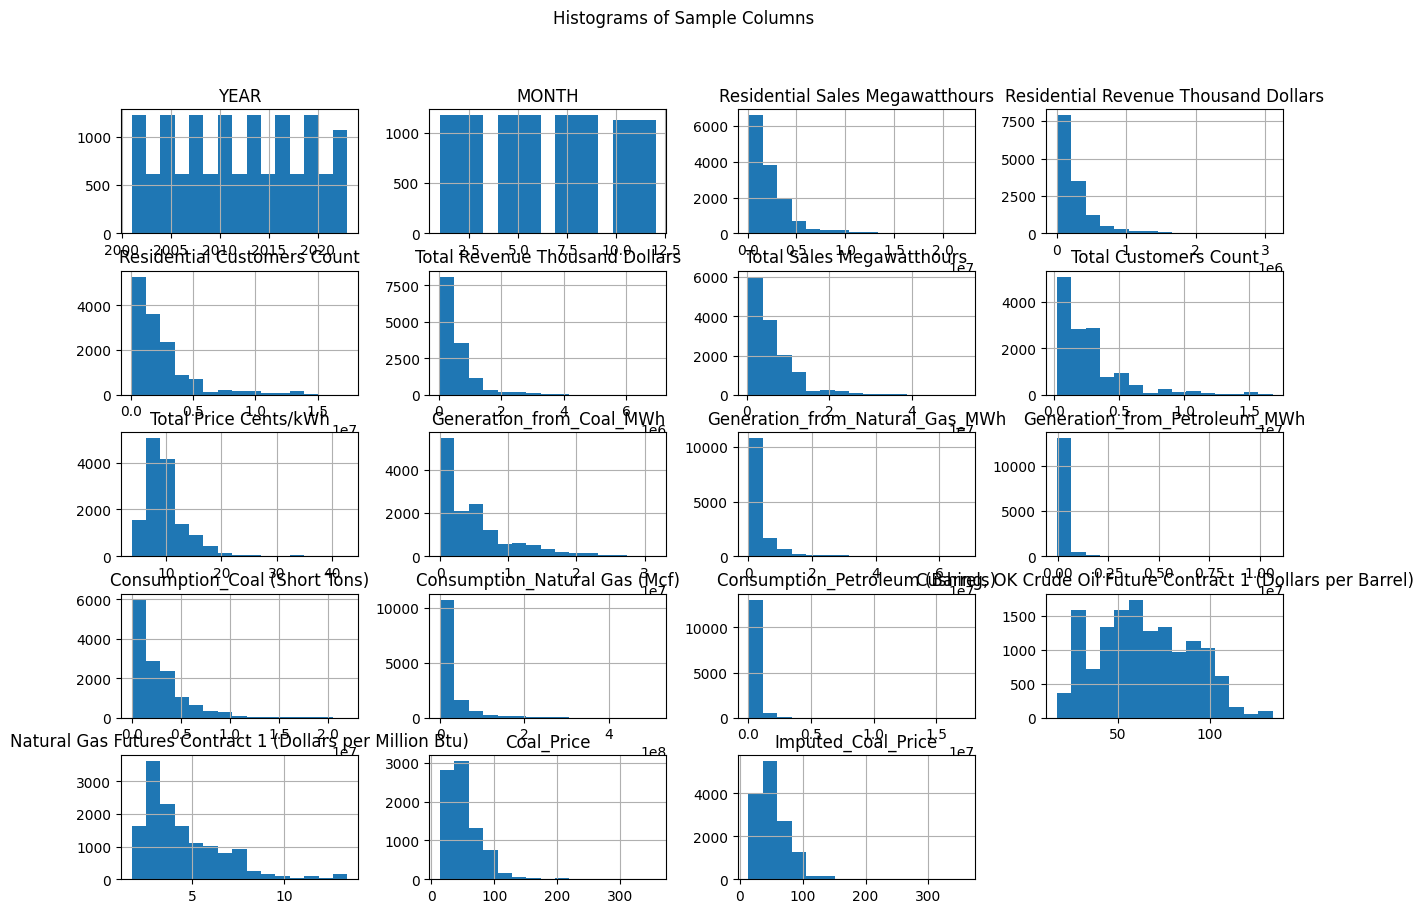

YEAR         MONTH  Residential Sales Megawatthours   
count  13923.000000  13923.000000                     1.392300e+04  \
mean    2011.879121      6.450549                     2.270155e+06   
std        6.568282      3.437465                     2.415779e+06   
min     2001.000000      1.000000                     7.388100e+04   
25%     2006.000000      3.000000                     5.570911e+05   
50%     2012.000000      6.000000                     1.664952e+06   
75%     2018.000000      9.000000                     3.057670e+06   
max     2023.000000     12.000000                     2.217976e+07   

       Residential Revenue Thousand Dollars  Residential Customers Count   
count                          1.392300e+04                 1.392300e+04  \
mean                           2.670896e+05                 2.399245e+06   
std                            3.132308e+05                 2.541958e+06   
min                            4.708000e+03                 6.112882e+04   
25%                            6.348339e+04                 6.716660e+05   
50%                            1.759420e+05                 1.684901e+06   
75%                            3.333750e+05                 2.878172e+06   
max                            3.107676e+06                 1.737222e+07   

       Total Revenue Thousand Dollars  Total Sales Megawatthours   
count                    1.392300e+04               1.392300e+04  \
mean                     5.916654e+05               6.055793e+06   
std                      6.694216e+05               5.943006e+06   
min                      4.015300e+04               3.922182e+05   
25%                      1.526437e+05               1.820106e+06   
50%                      4.007607e+05               4.596125e+06   
75%                      7.397581e+05               8.130287e+06   
max                      6.939053e+06               5.275494e+07   

       Total Customers Count  Total Price Cents/kWh  Generation_from_Coal_MWh   
count           1.392300e+04           13923.000000              1.392300e+04  \
mean            2.747126e+06              10.053334              4.990787e+06   
std             2.865433e+06               4.084957              5.502336e+06   
min             1.891951e+05               3.780000             -1.111800e+04   
25%             7.920350e+05               7.580000              4.383446e+05   
50%             1.993187e+06               9.130000              3.609138e+06   
75%             3.271840e+06              11.180000              6.777468e+06   
max             1.677166e+07              42.760000              3.163170e+07   

       Generation_from_Natural_Gas_MWh  Generation_from_Petroleum_MWh   
count                     1.392300e+04                   1.392300e+04  \
mean                      3.702377e+06                   1.630570e+05   
std                       6.629991e+06                   5.628755e+05   
min                      -1.806000e+03                  -5.306600e+04   
25%                       2.827560e+05                   4.441900e+03   
50%                       1.347626e+06                   1.759000e+04   
75%                       3.970754e+06                   9.373000e+04   
max                       6.781020e+07                   1.063476e+07   

       Consumption_Coal (Short Tons)  Consumption_Natural Gas (Mcf)   
count                   1.392300e+04                   1.392300e+04  \
mean                    2.657969e+06                   2.830891e+07   
std                     3.013417e+06                   5.018687e+07   
min                     0.000000e+00                   0.000000e+00   
25%                     2.343900e+05                   2.541332e+06   
50%                     1.991652e+06                   1.058877e+07   
75%                     3.813626e+06                   2.996575e+07   
max                     2.195535e+07                   5.116901e+08   

       Consumption_Petroleum (Barrels)   
count           

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_statistics = data.describe()

sample_columns = ['YEAR', 'MONTH', 'STATE','Residential Price Cents/kWh','Residential Sales Megawatthours'
                  ,'Residential Revenue Thousand Dollars','Residential Customers Count','Total Revenue Thousand Dollars',
                  'Total Sales Megawatthours','Total Customers Count','Total Price Cents/kWh',
                  'Generation_from_Coal_MWh','Generation_from_Natural_Gas_MWh','Generation_from_Petroleum_MWh',
                  'Consumption_Coal (Short Tons)','Consumption_Natural Gas (Mcf)','Consumption_Petroleum (Barrels)',
                  'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
                  'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
                  'Coal_Price','Imputed_Coal_Price']
data[sample_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Sample Columns")
plt.show()


summary_statistics


## Correlation

In [37]:
data.columns

Index(['YEAR', 'MONTH', 'STATE', 'Residential Price Cents/kWh',
       'Residential Sales Megawatthours',
       'Residential Revenue Thousand Dollars', 'Residential Customers Count',
       'Total Revenue Thousand Dollars', 'Total Sales Megawatthours',
       'Total Customers Count', 'Total Price Cents/kWh',
       'Generation_from_Coal_MWh', 'Generation_from_Natural_Gas_MWh',
       'Generation_from_Petroleum_MWh', 'Consumption_Coal (Short Tons)',
       'Consumption_Natural Gas (Mcf)', 'Consumption_Petroleum (Barrels)',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
       'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Coal_Price', 'Imputed_Coal_Price'],
      dtype='object')

##### correlation of required variables

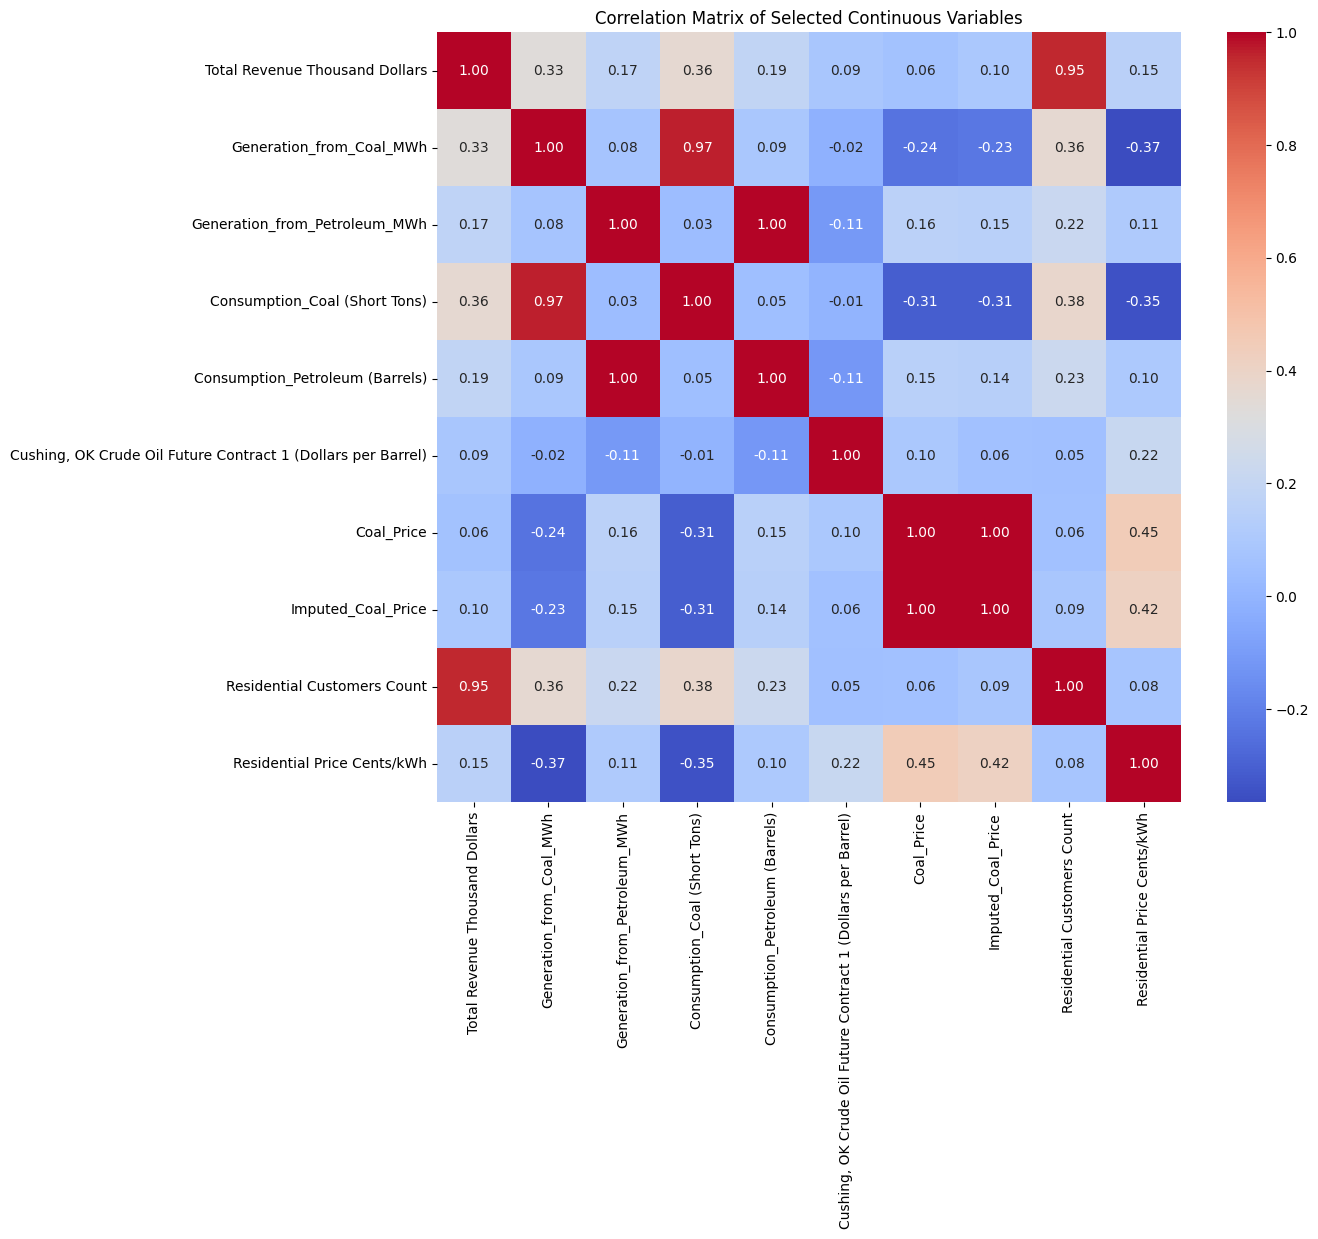

                                                    Total Revenue Thousand Dollars   
Total Revenue Thousand Dollars                                            1.000000  \
Generation_from_Coal_MWh                                                  0.329703   
Generation_from_Petroleum_MWh                                             0.174614   
Consumption_Coal (Short Tons)                                             0.361410   
Consumption_Petroleum (Barrels)                                           0.188752   
Cushing, OK Crude Oil Future Contract 1 (Dollar...                        0.087852   
Coal_Price                                                                0.063186   
Imputed_Coal_Price                                                        0.097923   
Residential Customers Count                                               0.953165   
Residential Price Cents/kWh                                               0.154812   

                                                    G

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



selected_columns = [
    'Total Revenue Thousand Dollars',
    'Generation_from_Coal_MWh',
    'Generation_from_Petroleum_MWh',
    'Consumption_Coal (Short Tons)',
    'Consumption_Petroleum (Barrels)',
    'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
    'Coal_Price','Imputed_Coal_Price',
    'Residential Customers Count', 'Residential Price Cents/kWh'
]


selected_data = data[selected_columns]


correlation_matrix = selected_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Continuous Variables")
plt.show()

print(correlation_matrix)

### Temporal Trends - Line Plot of Residential Price Cents/kWh Over Time (Year or Month)

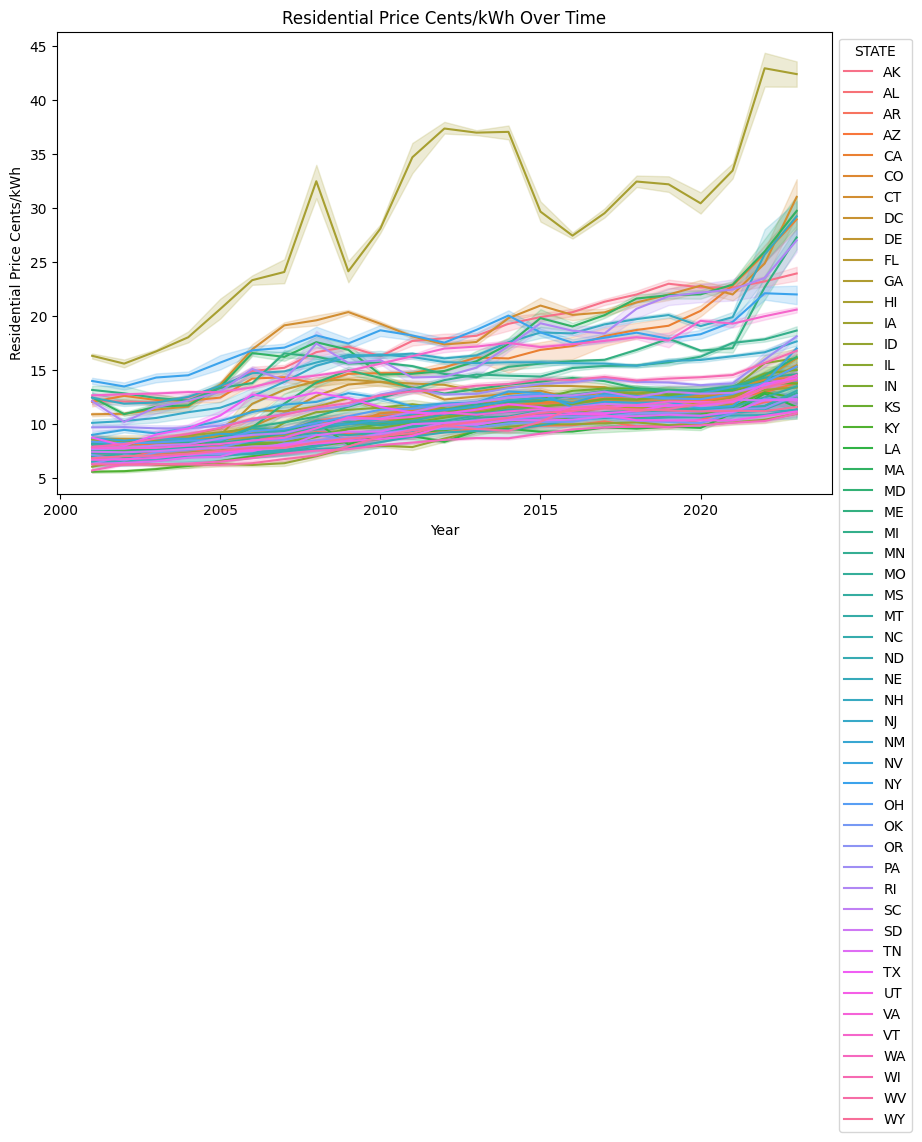

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='Residential Price Cents/kWh', data=data, hue='STATE')
plt.title('Residential Price Cents/kWh Over Time')
plt.xlabel('Year')
plt.ylabel('Residential Price Cents/kWh')
plt.legend(title='STATE', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


### Geographical Trends:
Bar Plot of Residential Price Cents/kWh Across States:

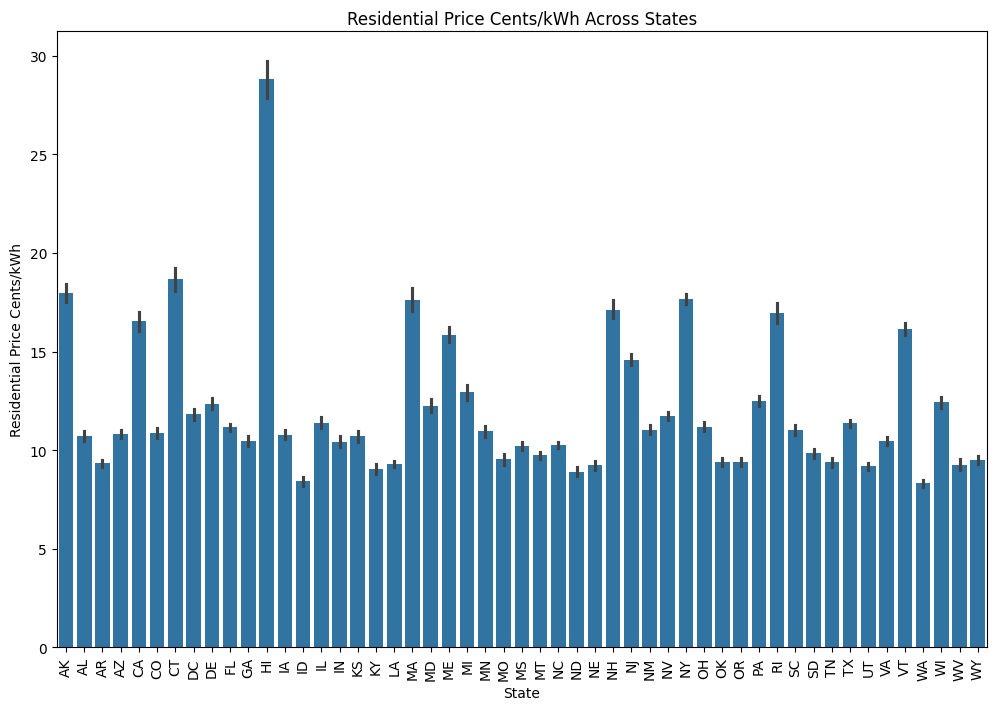

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='Residential Price Cents/kWh', data=data)
plt.title('Residential Price Cents/kWh Across States')
plt.xlabel('State')
plt.ylabel('Residential Price Cents/kWh')
plt.xticks(rotation=90)
plt.show()

### Consumption Patterns:
Scatter Plot of Residential Sales Megawatthours vs. Residential Price Cents/kWh:

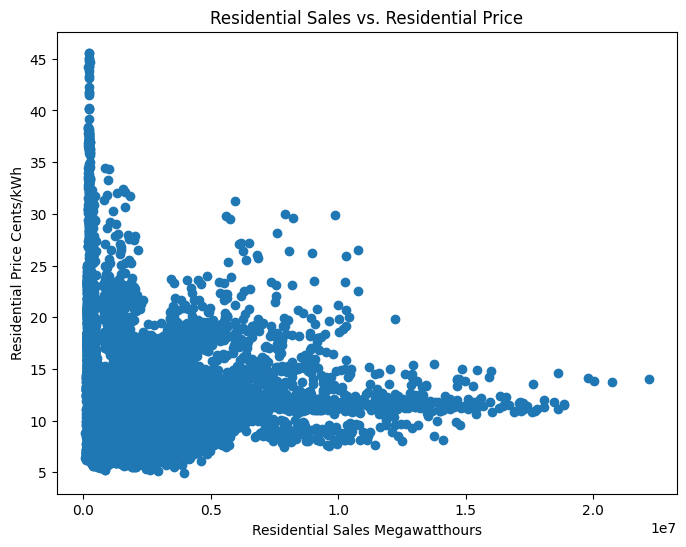

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Residential Sales Megawatthours'], data['Residential Price Cents/kWh'])
plt.title('Residential Sales vs. Residential Price')
plt.xlabel('Residential Sales Megawatthours')
plt.ylabel('Residential Price Cents/kWh')
plt.show()

## Checking outliers

In [45]:

data['Residential Price Cents/kWh'] = data['Residential Price Cents/kWh'].astype(float)

/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/2360949816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Residential Price Cents/kWh'] = data['Residential Price Cents/kWh'].astype(float)


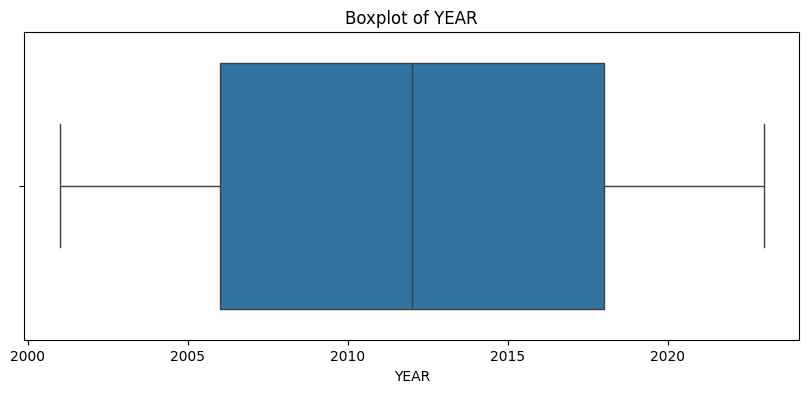

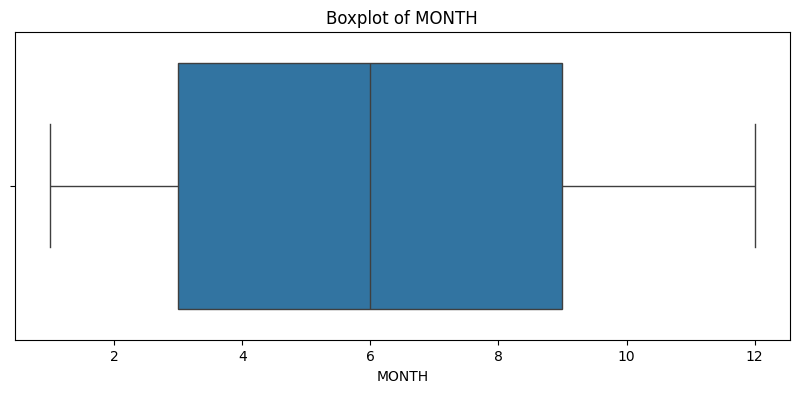

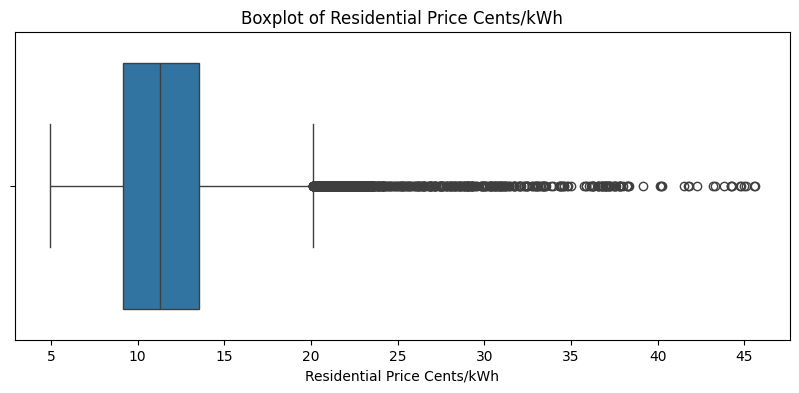

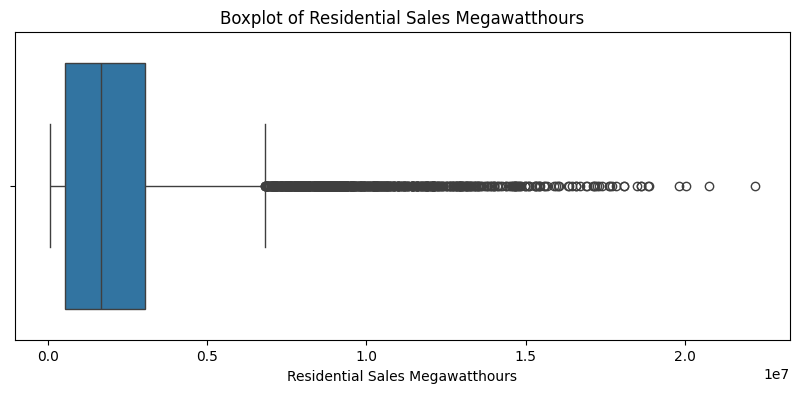

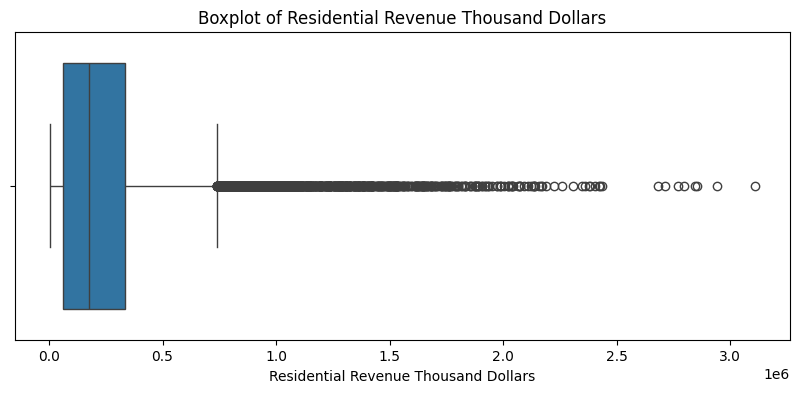

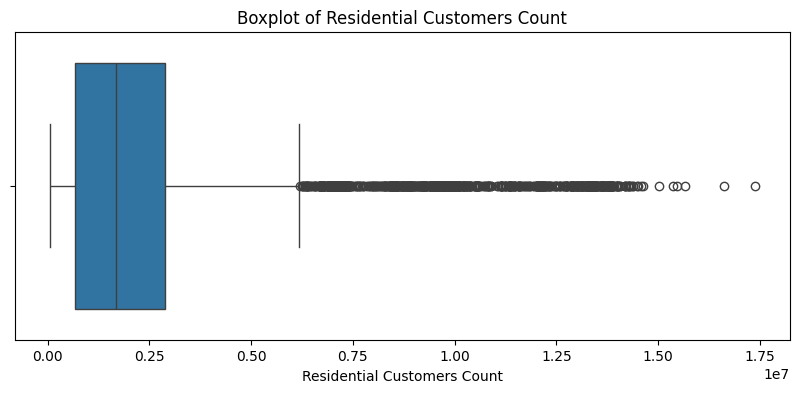

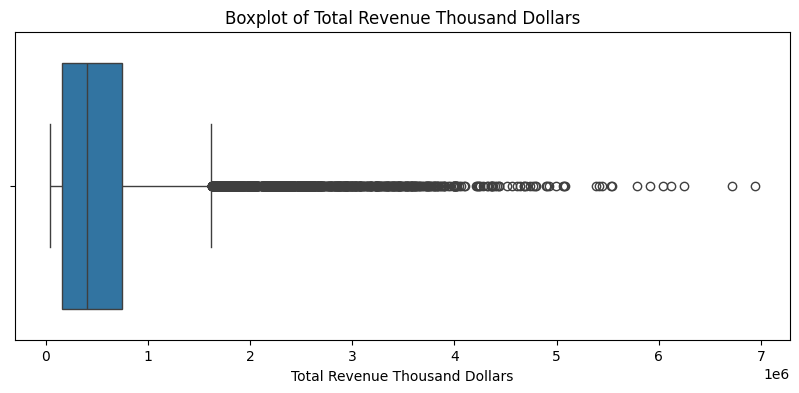

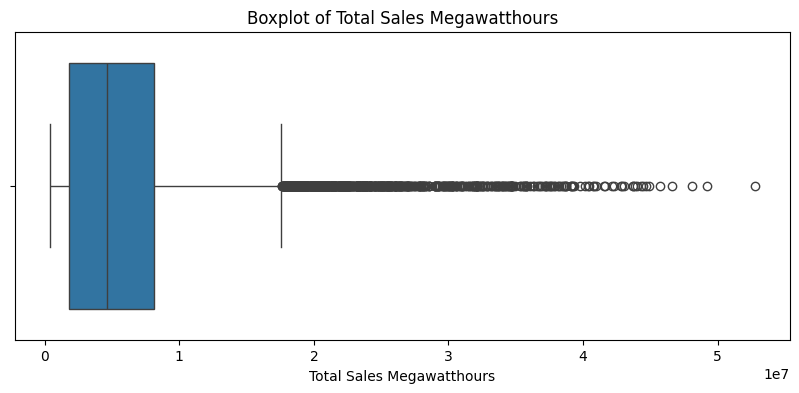

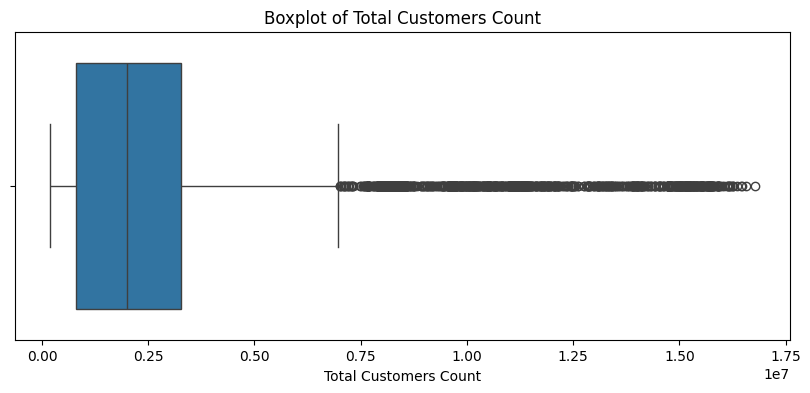

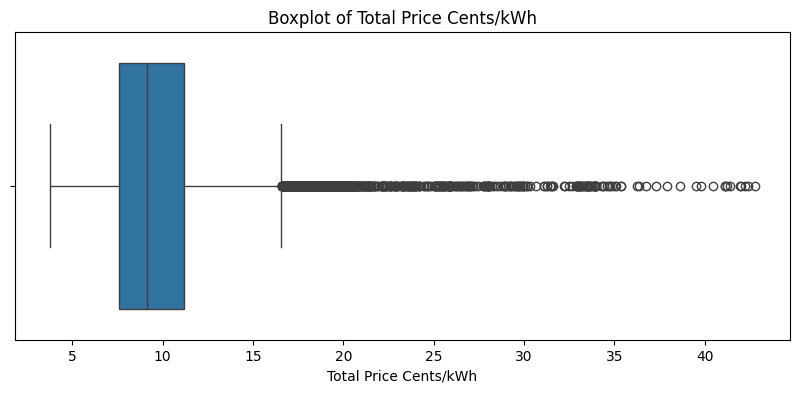

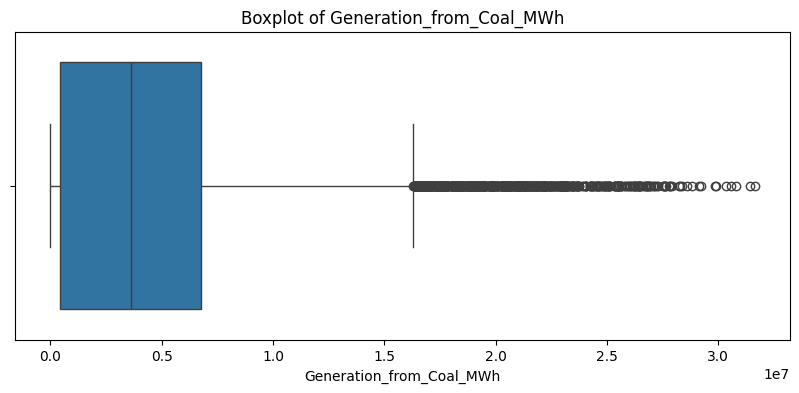

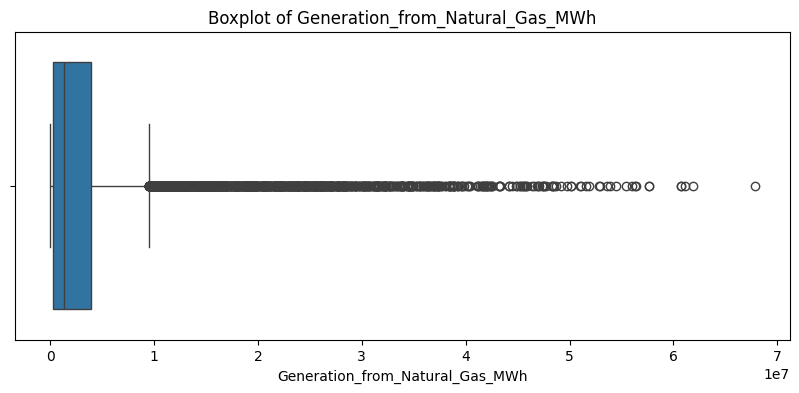

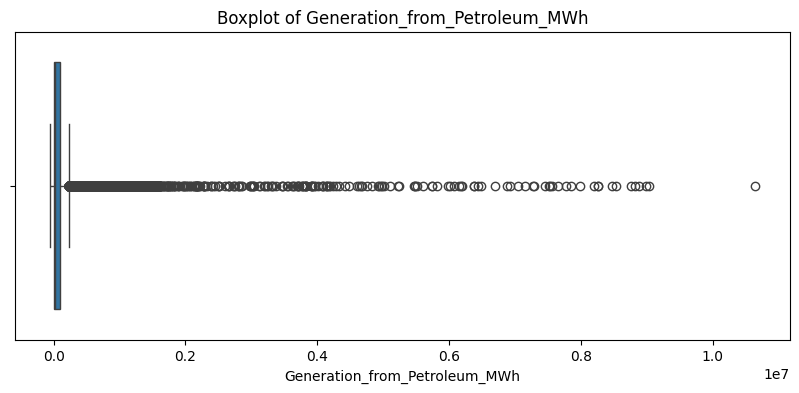

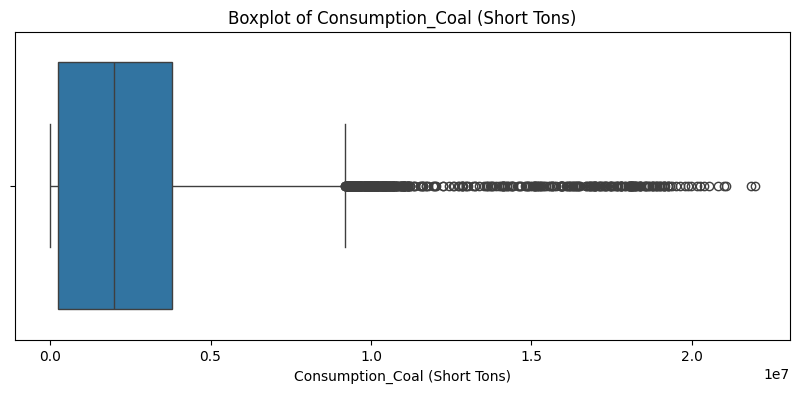

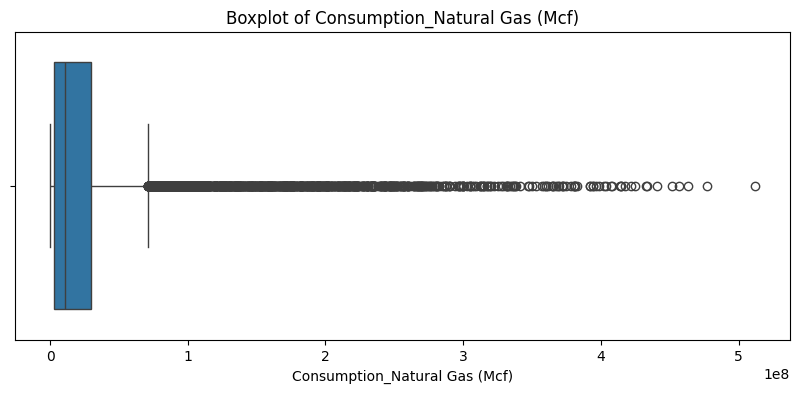

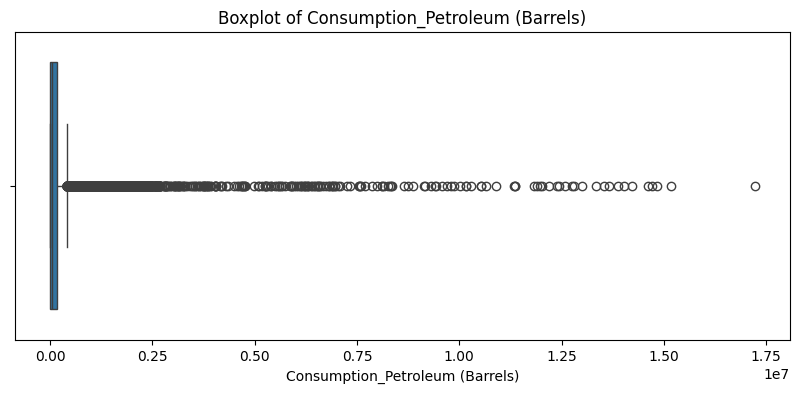

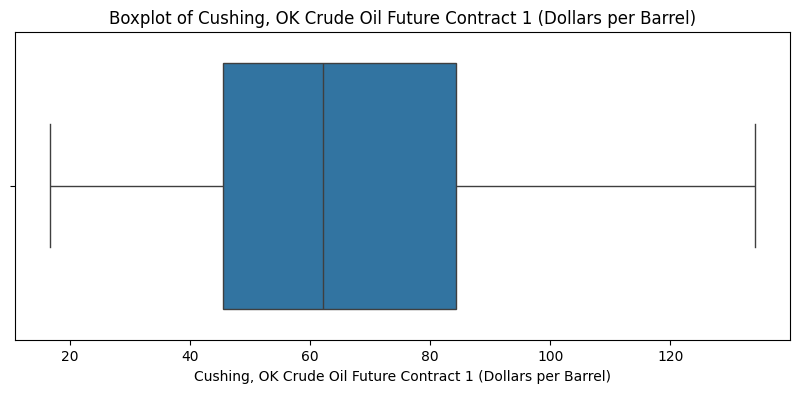

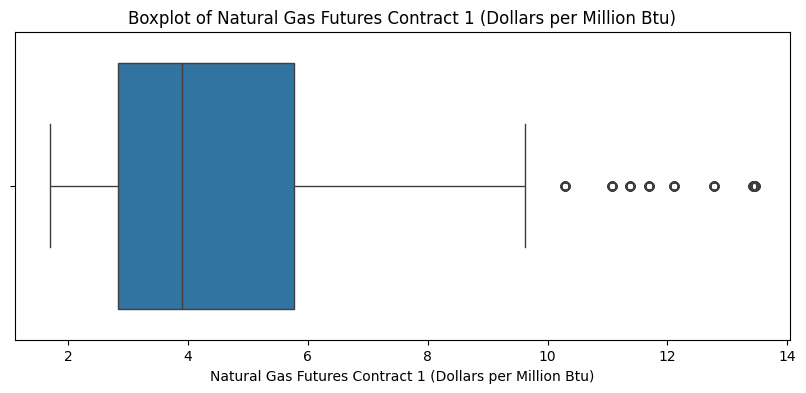

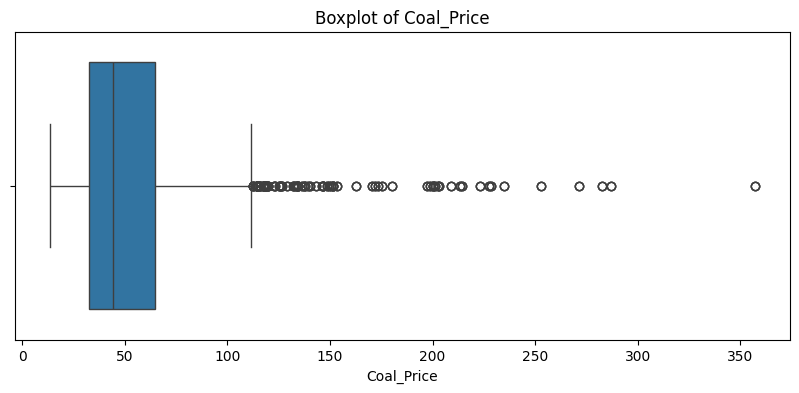

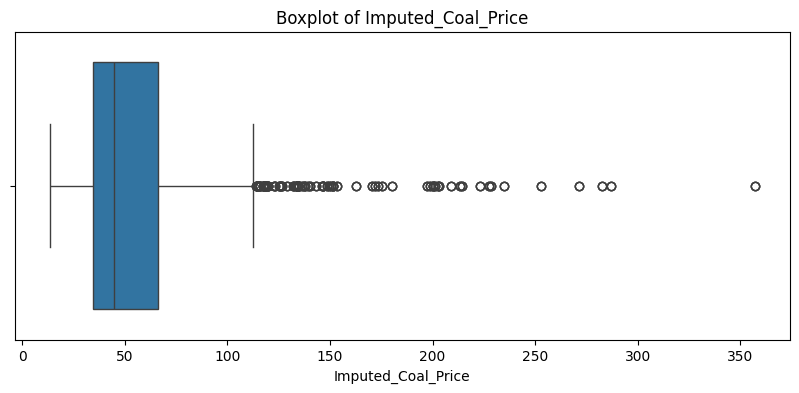

In [46]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [47]:
# the IQR for each numerical column and detect outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in YEAR: 0
Number of outliers in MONTH: 0
Number of outliers in Residential Price Cents/kWh: 712
Number of outliers in Residential Sales Megawatthours: 708
Number of outliers in Residential Revenue Thousand Dollars: 944
Number of outliers in Residential Customers Count: 1022
Number of outliers in Total Revenue Thousand Dollars: 965
Number of outliers in Total Sales Megawatthours: 706
Number of outliers in Total Customers Count: 999
Number of outliers in Total Price Cents/kWh: 917
Number of outliers in Generation_from_Coal_MWh: 702
Number of outliers in Generation_from_Natural_Gas_MWh: 1338
Number of outliers in Generation_from_Petroleum_MWh: 1958
Number of outliers in Consumption_Coal (Short Tons): 532
Number of outliers in Consumption_Natural Gas (Mcf): 1369
Number of outliers in Consumption_Petroleum (Barrels): 2075
Number of outliers in Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel): 0
Number of outliers in Natural Gas Futures Contract 1 (Dollars per

Outliers are handled using capping method below

In [48]:
from scipy import stats  
# 95th percentile for each column
percentile_95 = data[numerical_cols].quantile(0.95)

# capping of values at the 95th percentile
for col in numerical_cols:
    data[col] = np.where(data[col] > percentile_95[col], percentile_95[col], data[col])


capped_data = data[numerical_cols]
capped_outliers = capped_data[(np.abs(stats.zscore(capped_data)) > 3)].dropna(how='all')


capped_outliers_count = capped_outliers.count()
capped_outliers, capped_outliers_count


/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/193523791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > percentile_95[col], percentile_95[col], data[col])


(       YEAR  MONTH  Residential Price Cents/kWh   
 9       NaN    NaN                          NaN  \
 11      NaN    NaN                          NaN   
 38      NaN    NaN                          NaN   
 43      NaN    NaN                          NaN   
 55      NaN    NaN                          NaN   
 ...     ...    ...                          ...   
 13897   NaN    NaN                          NaN   
 13906   NaN    NaN                          NaN   
 13910   NaN    NaN                          NaN   
 13915   NaN    NaN                          NaN   
 13917   NaN    NaN                          NaN   
 
        Residential Sales Megawatthours  Residential Revenue Thousand Dollars   
 9                                  NaN                                   NaN  \
 11                                 NaN                                   NaN   
 38                                 NaN                                   NaN   
 43                                 NaN           

Further handling of outliers using log transformation for the 3 columns that had outliers above

In [49]:
data_copy = data.copy()

#  skewed columns
skewed_cols = data_copy[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[skewed_cols > 1]

# log transformation 
for col in skewed_cols.index:
    data_copy[col] = np.log1p(data_copy[col])


/Users/kaushikmanjunatha/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
# Rechecking 
capped_outliers = data_copy[(np.abs(stats.zscore(capped_data)) > 3)].dropna(how='all')


capped_outliers_count = capped_outliers.count()
capped_outliers, capped_outliers_count


(       YEAR  MONTH STATE  Residential Price Cents/kWh   
 9       NaN    NaN   NaN                          NaN  \
 11      NaN    NaN   NaN                          NaN   
 38      NaN    NaN   NaN                          NaN   
 43      NaN    NaN   NaN                          NaN   
 55      NaN    NaN   NaN                          NaN   
 ...     ...    ...   ...                          ...   
 13897   NaN    NaN   NaN                          NaN   
 13906   NaN    NaN   NaN                          NaN   
 13910   NaN    NaN   NaN                          NaN   
 13915   NaN    NaN   NaN                          NaN   
 13917   NaN    NaN   NaN                          NaN   
 
        Residential Sales Megawatthours  Residential Revenue Thousand Dollars   
 9                                  NaN                                   NaN  \
 11                                 NaN                                   NaN   
 38                                 NaN                    

Still there were outlers, next we are going ahead with log transformation for the 3 columns

In [51]:

columns_with_remaining_outliers = [
    'Generation_from_Natural_Gas_MWh', 
    'Generation_from_Petroleum_MWh', 
    'Consumption_Petroleum (Barrels)'
]


for column in columns_with_remaining_outliers:
    upper_bound = data[column].quantile(0.99)
    lower_bound = data[column].quantile(0.01)
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# logarithmic transformation
for column in columns_with_remaining_outliers:
    data[column + '_log'] = np.log1p(data[column])  # log1p is used to handle zero values


for column in columns_with_remaining_outliers + [col + '_log' for col in columns_with_remaining_outliers]:
    data['z_score'] = stats.zscore(data[column].dropna())
    outlier_count = data[(data['z_score'] > 3) | (data['z_score'] < -3)].shape[0]
    print(f"Number of outliers in {column} after further handling: {outlier_count}")

data.drop(columns=['z_score'], inplace=True)

Number of outliers in Generation_from_Natural_Gas_MWh after further handling: 699
Number of outliers in Generation_from_Petroleum_MWh after further handling: 775
Number of outliers in Consumption_Petroleum (Barrels) after further handling: 767
Number of outliers in Generation_from_Natural_Gas_MWh_log after further handling: 437
Number of outliers in Generation_from_Petroleum_MWh_log after further handling: 294
Number of outliers in Consumption_Petroleum (Barrels)_log after further handling: 297


/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1877137497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1877137497.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/1877137497.py:11: SettingWithCo

the outlier count has been reduced using log transformation

In [52]:
missing_values = data.isnull().sum()
data_info, missing_values

(None,
 YEAR                                                               0
 MONTH                                                              0
 STATE                                                              0
 Residential Price Cents/kWh                                        0
 Residential Sales Megawatthours                                    0
 Residential Revenue Thousand Dollars                               0
 Residential Customers Count                                        0
 Total Revenue Thousand Dollars                                     0
 Total Sales Megawatthours                                          0
 Total Customers Count                                              0
 Total Price Cents/kWh                                              0
 Generation_from_Coal_MWh                                           0
 Generation_from_Natural_Gas_MWh                                    0
 Generation_from_Petroleum_MWh                                      0
 Consumption_

imputing the missihng value for 150 records using simpleimputer

In [53]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
data['Generation_from_Petroleum_MWh_log'] = imputer.fit_transform(data['Generation_from_Petroleum_MWh_log'].values.reshape(-1, 1))

/var/folders/gp/2k7ydjgd1pvdz7fcbjx5rvs00000gn/T/ipykernel_65234/3744326383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Generation_from_Petroleum_MWh_log'] = imputer.fit_transform(data['Generation_from_Petroleum_MWh_log'].values.reshape(-1, 1))


Defining input and target variables for modelling

In [54]:

X = data[['Total Revenue Thousand Dollars', 'Generation_from_Coal_MWh', 'Generation_from_Petroleum_MWh_log','Consumption_Coal (Short Tons)',
      'Consumption_Petroleum (Barrels)_log',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)','Imputed_Coal_Price','Residential Customers Count']]
y = data['Residential Price Cents/kWh'] 

In [55]:
# split size 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### 1. Liner Regression

Linear Regression Results:
 Dataset      MSE       R²
Training 6.895778 0.455354
 Testing 7.126874 0.448759
Variance: 0.0065949567532895825
Training time: 0.005273249989841133 sec


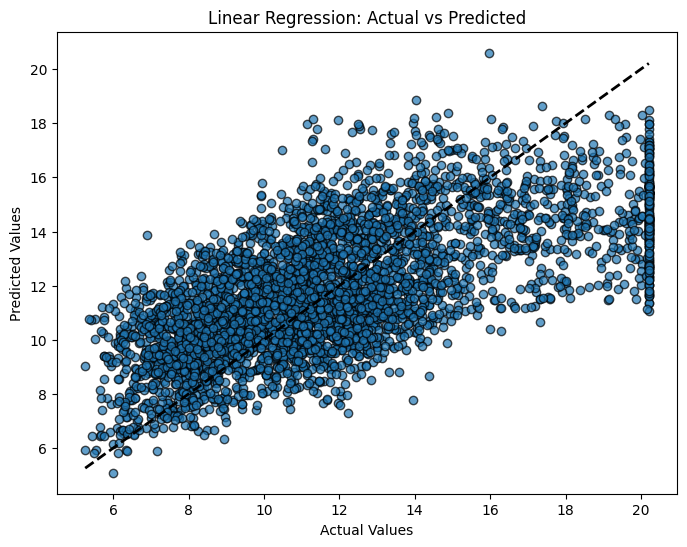

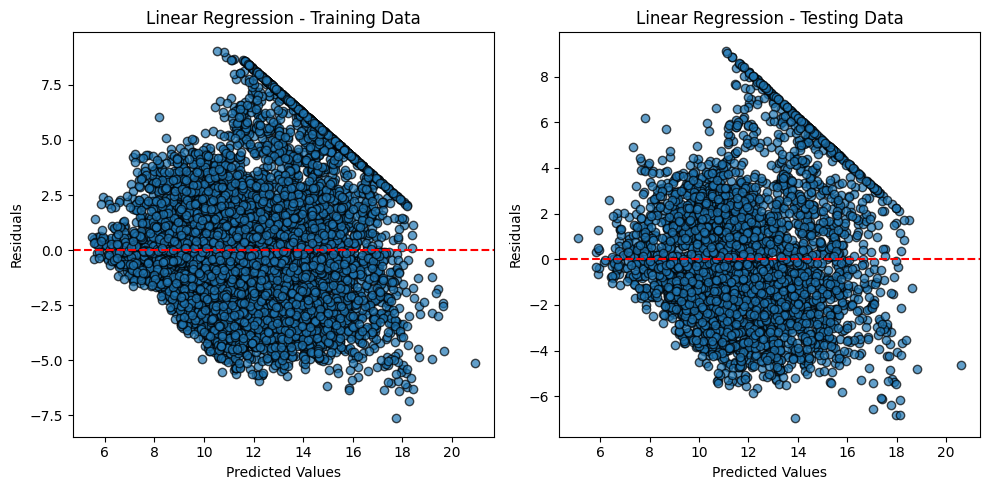

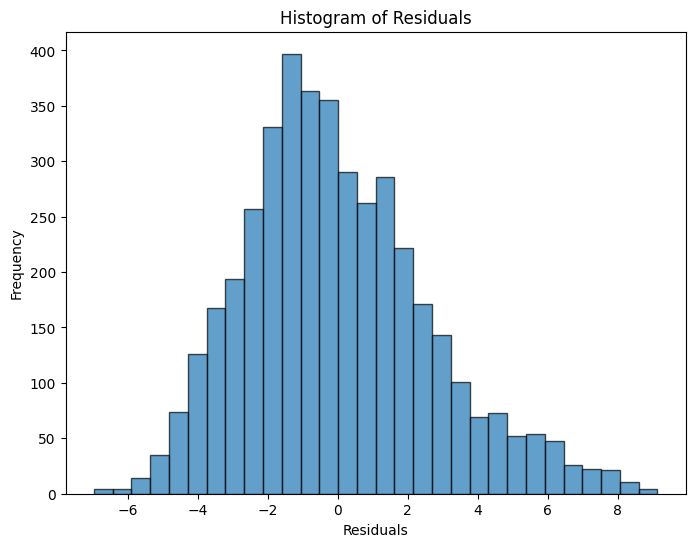

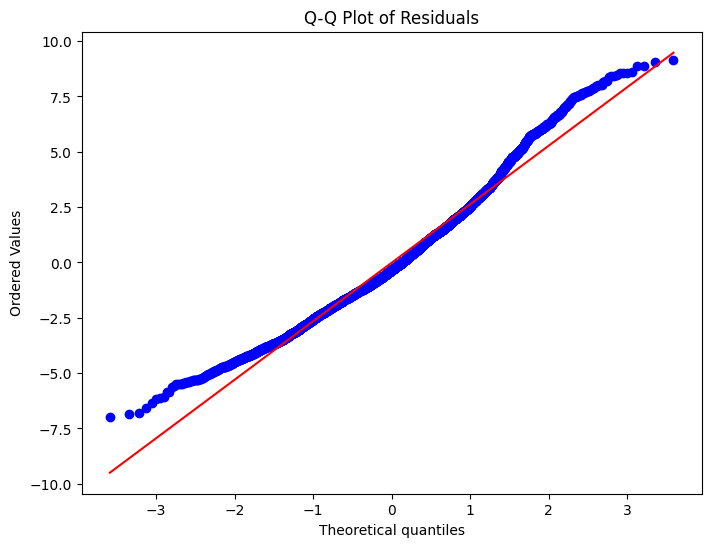

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import timeit


lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)

# Prediction
lin_train_pred = lin_reg.predict(X_train)
lin_test_pred = lin_reg.predict(X_test)

# R2 and MSE for the training set
lin_train_r2 = r2_score(y_train, lin_train_pred)
lin_train_mse = mean_squared_error(y_train, lin_train_pred)

# R2 and MSE for the test set
lin_test_r2 = r2_score(y_test, lin_test_pred)
lin_test_mse = mean_squared_error(y_test, lin_test_pred)

lin_results = {
    'train_r2': lin_train_r2,
    'test_r2': lin_test_r2,
    'train_mse': lin_train_mse,
    'test_mse': lin_test_mse
}


results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [lin_train_mse, lin_test_mse],
    'R²': [lin_train_r2, lin_test_r2]
}


results_df = pd.DataFrame(results_dict)


print("Linear Regression Results:")
print(results_df.to_string(index=False))

variance = lin_train_r2 - lin_test_r2
print('Variance:', variance)

#  training time
start = timeit.default_timer()
lin_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: %s sec' %(stop-start))

#  actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# plot residuals
def plot_residuals(model, X_train, y_train, X_test, y_test, title):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_res = y_train - train_pred
    test_res = y_test - test_pred

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_pred, train_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(test_pred, test_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Testing Data')

    plt.tight_layout()
    plt.show()


plot_residuals(lin_reg, X_train, y_train, X_test, y_test, "Linear Regression")

# Calculate residuals
residuals = y_test - lin_test_pred

# histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


cross validation

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()

cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='r2')
average_cv_score = cv_scores.mean()
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.45039851 0.46049111 0.44797511 0.454501   0.45401093]
Average Cross-Validation Score: 0.4534753319312911


### 2. PolynomialFeatures

Polynomial Regression Results:
 Dataset      MSE       R²
Training 4.961722 0.608110
 Testing 5.225560 0.595819
Variance: 0.01229098769434911
Training time: 0.2981424169847742 sec


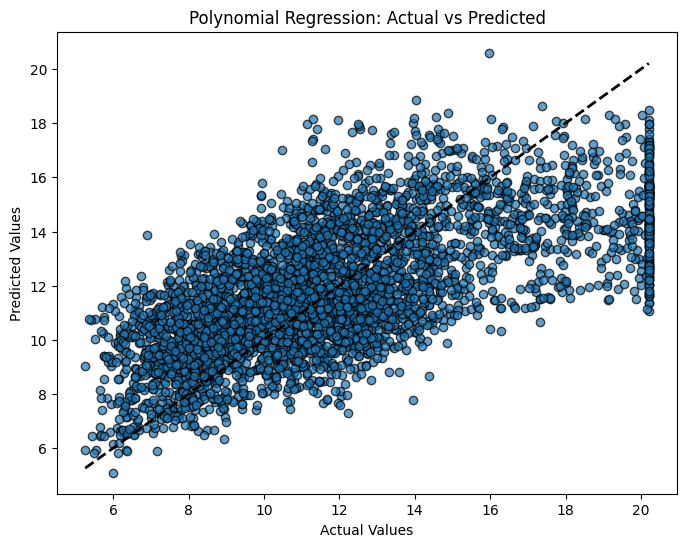

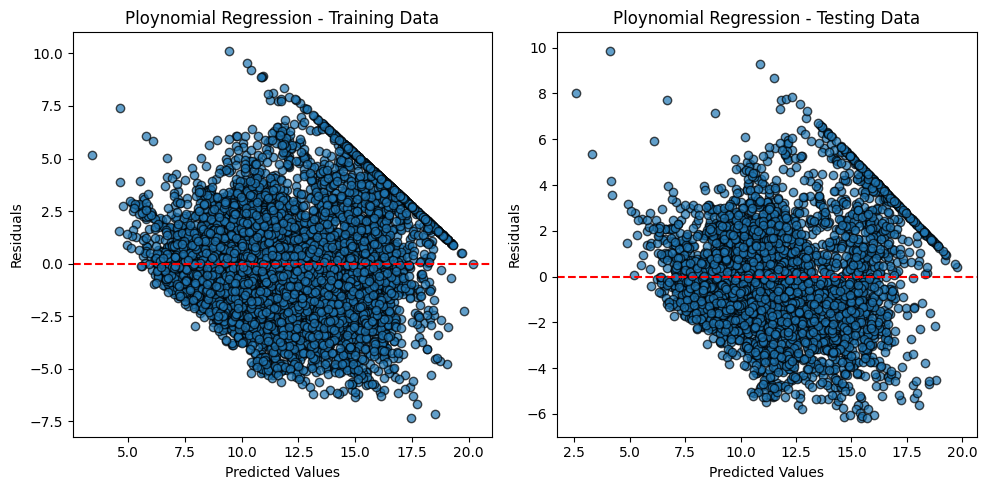

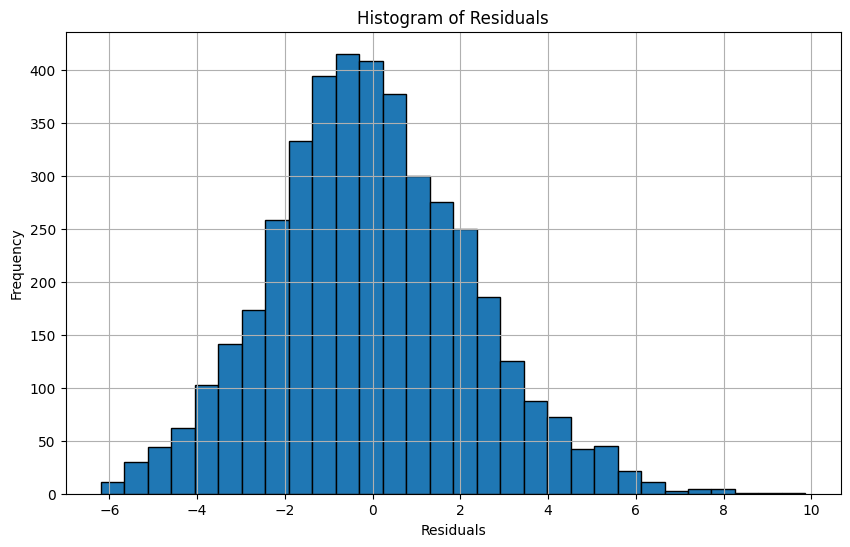

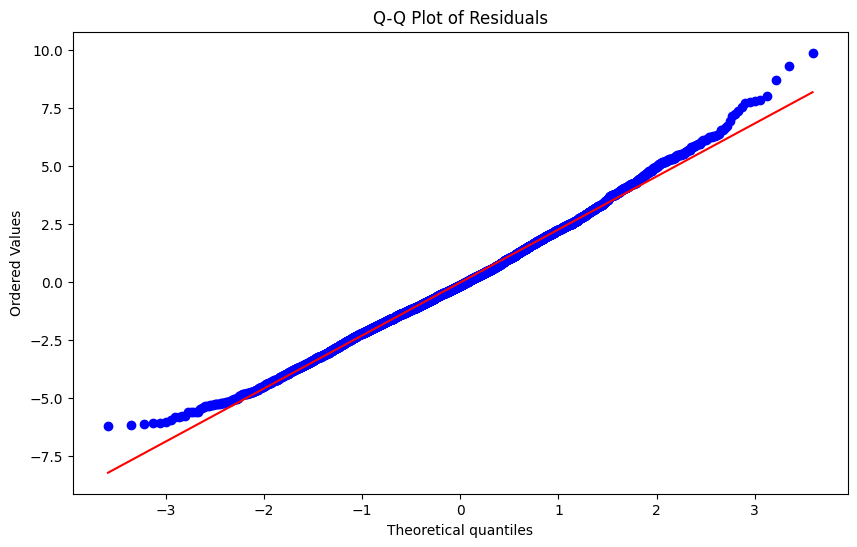

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


degree = 2  
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())


poly_reg.fit(X_train, y_train)


poly_train_pred = poly_reg.predict(X_train)
poly_test_pred = poly_reg.predict(X_test)


poly_train_r2 = r2_score(y_train, poly_train_pred)
poly_train_mse = mean_squared_error(y_train, poly_train_pred)


poly_test_r2 = r2_score(y_test, poly_test_pred)
poly_test_mse = mean_squared_error(y_test, poly_test_pred)


poly_results = {
    'train_r2': poly_train_r2,
    'test_r2': poly_test_r2,
    'train_mse': poly_train_mse,
    'test_mse': poly_test_mse
}


poly_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [poly_train_mse, poly_test_mse],
    'R²': [poly_train_r2, poly_test_r2]
}


poly_results_df = pd.DataFrame(poly_results_dict)


print("Polynomial Regression Results:")
print(poly_results_df.to_string(index=False))

variance = poly_train_r2 - poly_test_r2
print('Variance:', variance)

import timeit
start = timeit.default_timer()
poly_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: %s sec' %(stop-start))



plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()


plot_residuals(poly_reg, X_train, y_train, X_test, y_test, "Ploynomial Regression")


y_pred = poly_reg.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical quantiles')
plt.show()

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

cv_scores = cross_val_score(poly_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.59982007 0.59692888 0.61784321 0.5887626  0.61096833]
Average Cross-Validation Score: 0.602864615997185


### 3. Random Forest

Random Forest Regressor Results:
 Dataset      MSE       R²
Training 0.095306 0.992473
 Testing 0.724419 0.943968
Variance: 0.04850401361236656
Training time: 7.612736582988873 sec


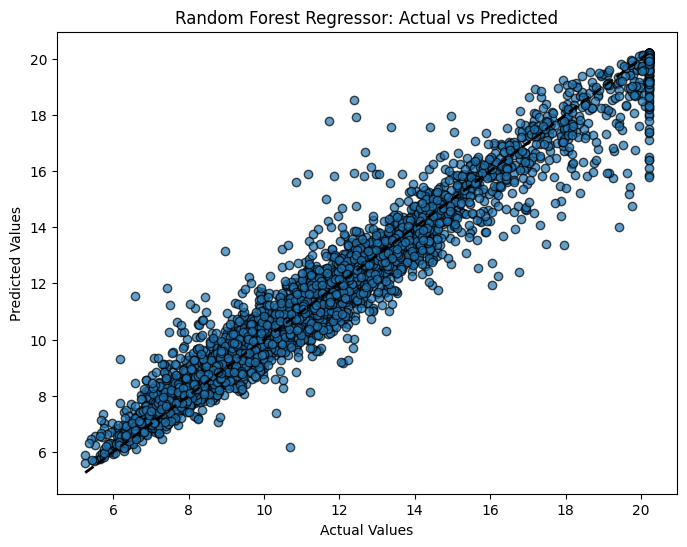

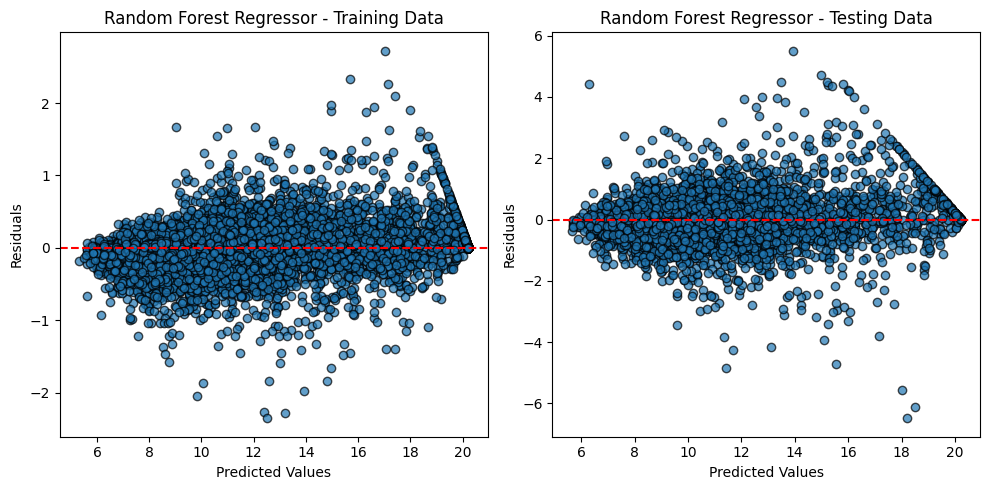

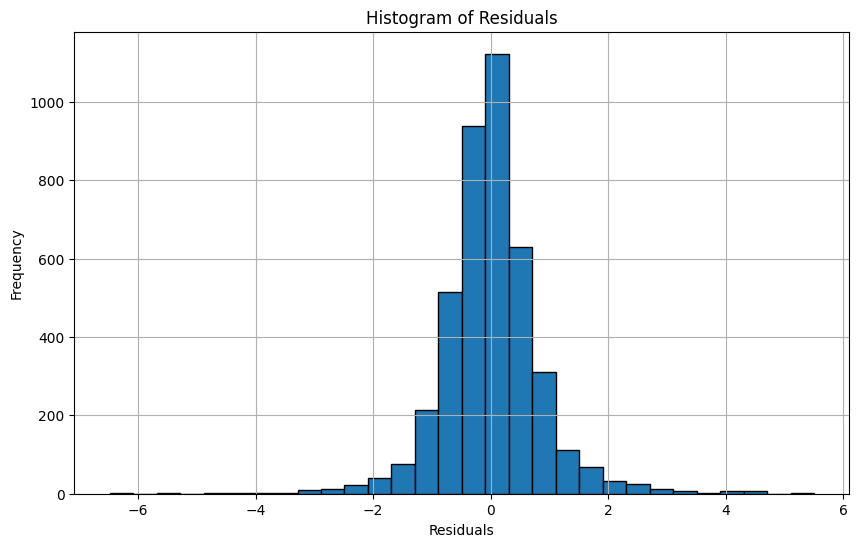

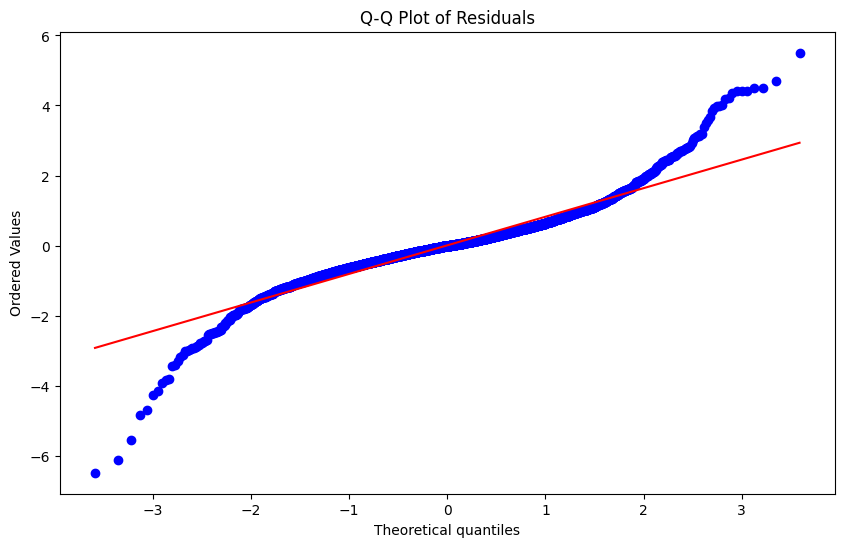

In [61]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

rf_train_pred = rf_reg.predict(X_train)
rf_test_pred = rf_reg.predict(X_test)

rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)

rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

rf_results = {
    'train_r2': rf_train_r2,
    'test_r2': rf_test_r2,
    'train_mse': rf_train_mse,
    'test_mse': rf_test_mse
}

rf_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [rf_train_mse, rf_test_mse],
    'R²': [rf_train_r2, rf_test_r2]
}

rf_results_df = pd.DataFrame(rf_results_dict)

print("Random Forest Regressor Results:")
print(rf_results_df.to_string(index=False))

variance = rf_train_r2 - rf_test_r2
print('Variance:', variance)


import timeit
start = timeit.default_timer()
rf_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: %s sec' %(stop-start))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.show()


plot_residuals(rf_reg, X_train, y_train, X_test, y_test, "Random Forest Regressor")

y_pred = rf_reg.predict(X_test)

residuals = y_test - y_pred

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical quantiles')
plt.show()



In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(random_state=42)

cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.93790882 0.93672158 0.93859996 0.93398523 0.94683698]
Average Cross-Validation Score: 0.9388105147098387


feature importance

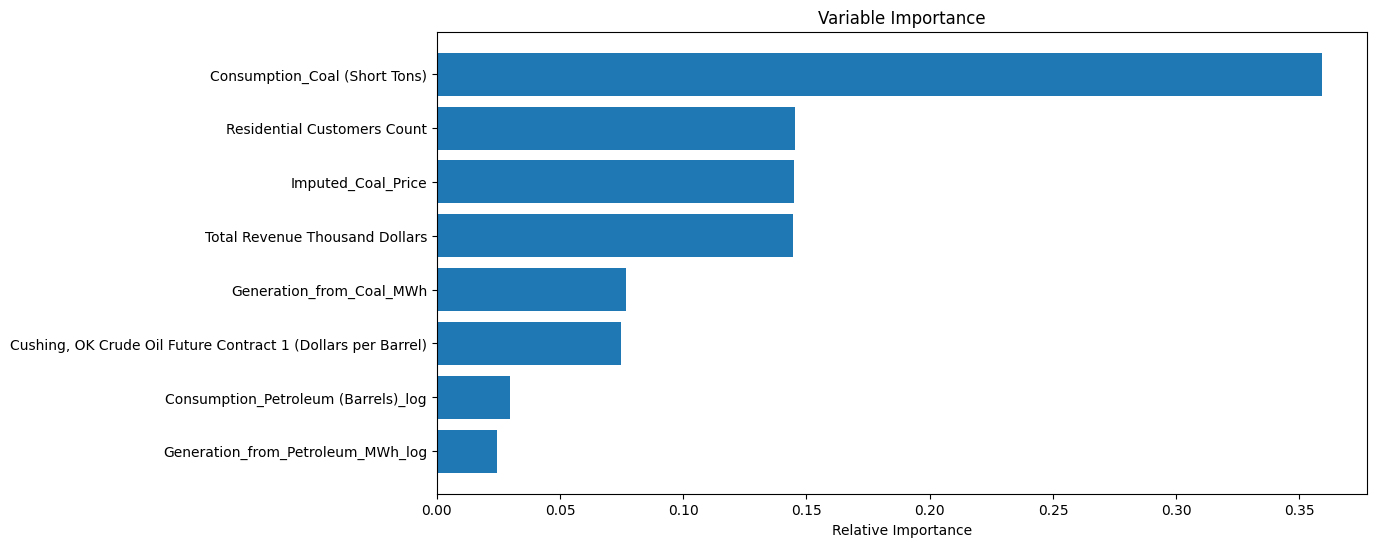

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

feature_importance = rf_reg.feature_importances_

sorted_idx = np.argsort(feature_importance)

column_names = X.columns[sorted_idx]

pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, column_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()



### Cross-validation

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)

cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.93790882 0.93672158 0.93859996 0.93398523 0.94683698]
Average Cross-Validation Score: 0.9388105147098387


### 4. XG Boosting Regressor

In [65]:
!pip install xgboost

Results for Extreme Gradient Boosting (XGBoost) Regressor:
 Dataset      MSE       R²
Training 0.223979 0.982310
 Testing 0.781068 0.939587
Variance: 0.042722701997057855
Training time: 0.1137 sec


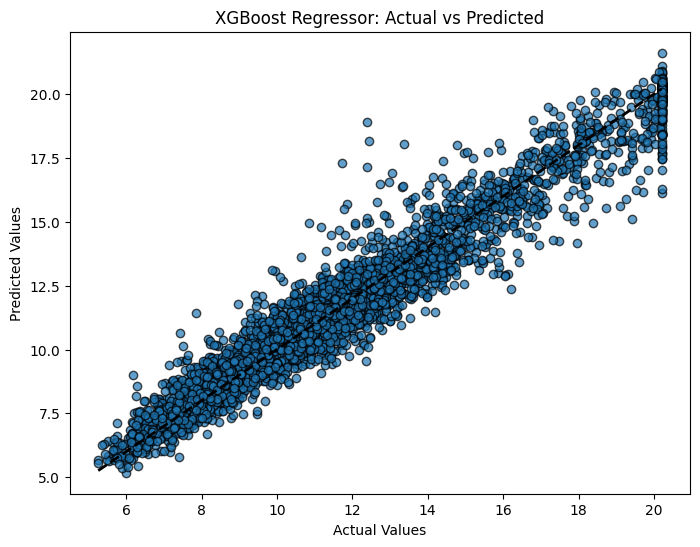

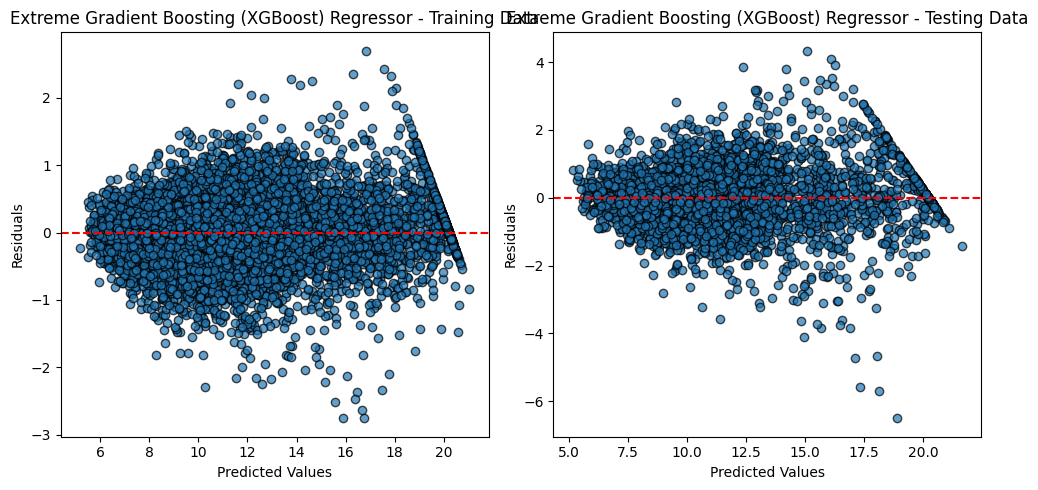

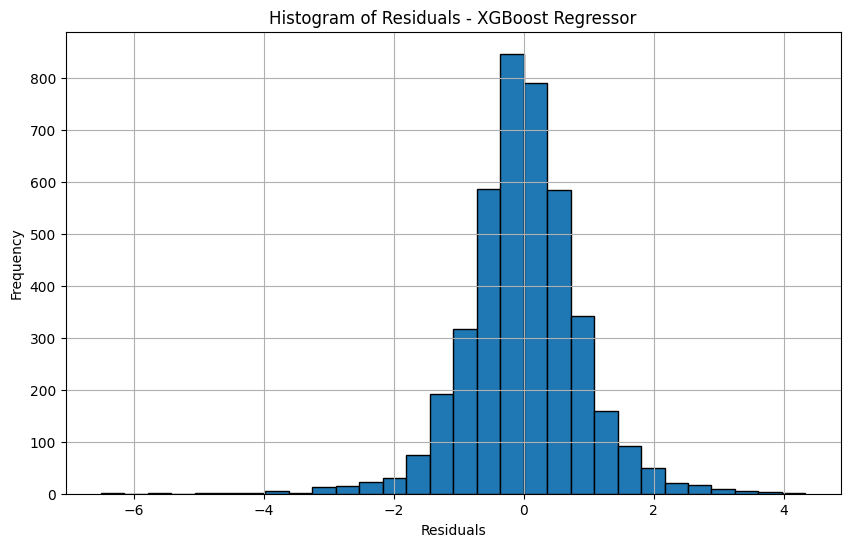

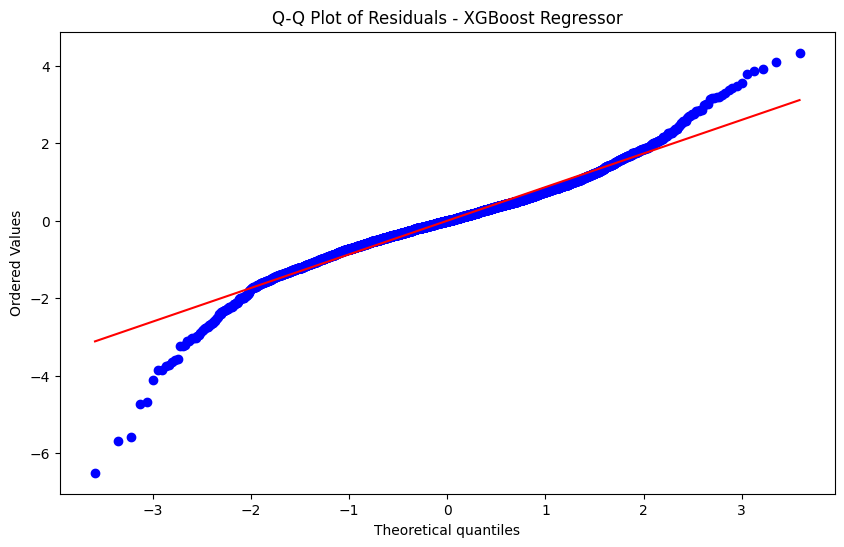

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import timeit

xgb_reg = XGBRegressor()


xgb_reg.fit(X_train, y_train)


xgb_train_pred = xgb_reg.predict(X_train)
xgb_test_pred = xgb_reg.predict(X_test)


xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_test_mse = mean_squared_error(y_test, xgb_test_pred)


xgb_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [xgb_train_mse, xgb_test_mse],
    'R²': [xgb_train_r2, xgb_test_r2]
}


xgb_df = pd.DataFrame(xgb_results_dict)


print("Results for Extreme Gradient Boosting (XGBoost) Regressor:")
print(xgb_df.to_string(index=False))


variance = xgb_train_r2 - xgb_test_r2
print('Variance:', variance)


start = timeit.default_timer()
xgb_reg.fit(X_train, y_train) # Refitting the model
stop = timeit.default_timer()
print('Training time: {:.4f} sec'.format(stop - start))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Actual vs Predicted')
plt.show()


def plot_residuals(model, X_train, y_train, X_test, y_test, title):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_res = y_train - train_pred
    test_res = y_test - test_pred

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_pred, train_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(test_pred, test_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Testing Data')

    plt.tight_layout()
    plt.show()


plot_residuals(xgb_reg, X_train, y_train, X_test, y_test, "Extreme Gradient Boosting (XGBoost) Regressor")


residuals = y_test - xgb_test_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals - XGBoost Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals - XGBoost Regressor')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical quantiles')
plt.show()



In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=42)

cv_scores = cross_val_score(gb_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.82343465 0.82758771 0.82630736 0.8198131  0.84180077]
Average Cross-Validation Score: 0.8277887173146784


## 5. Gradient Boost Regressor

In [77]:
!pip install xgboost

Results for Gradient Boosting Regressor:
 Dataset      MSE       R²
Training 1.966864 0.844652
 Testing 2.249231 0.826029
Variance: 0.01862290972234759
Training time: 3.0338 sec


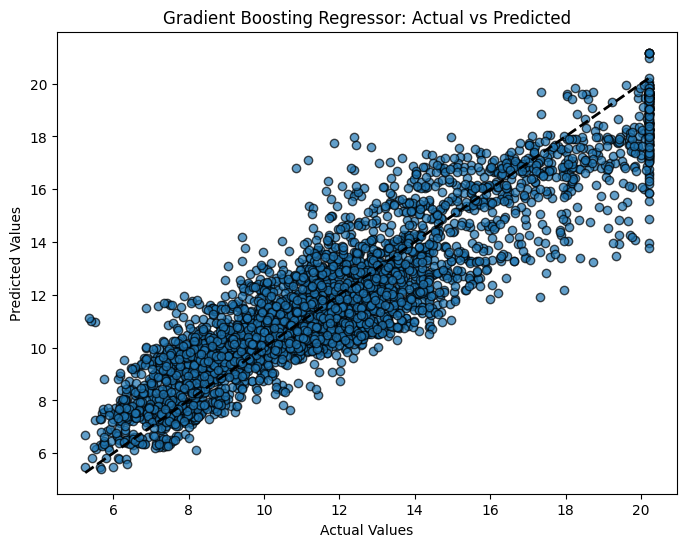

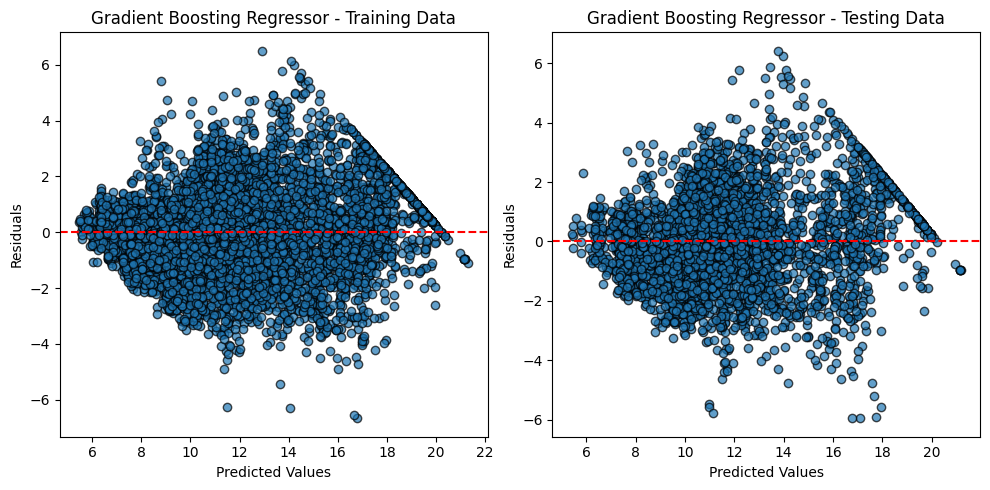

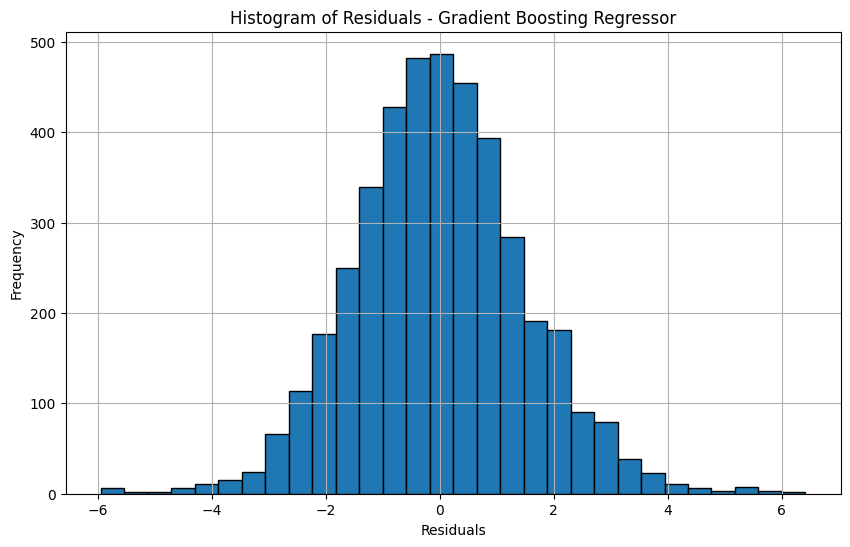

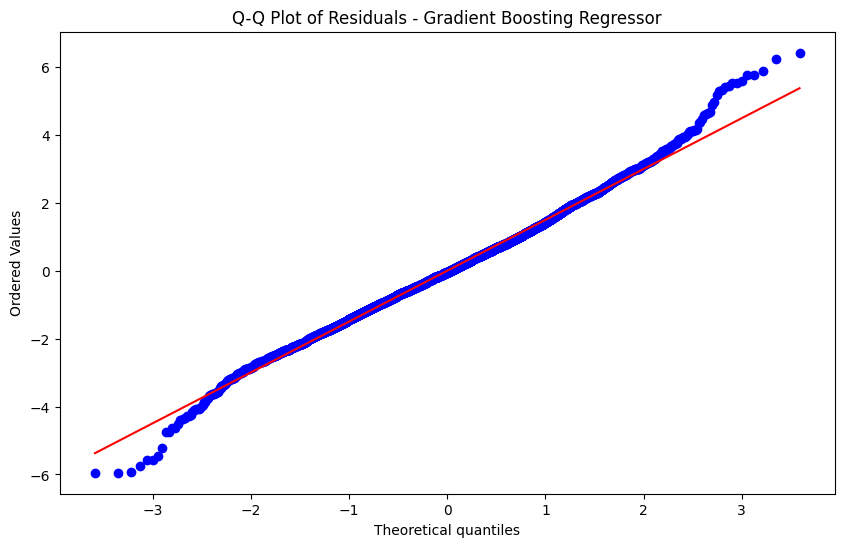

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import timeit

gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

gb_train_pred = gb_reg.predict(X_train)
gb_test_pred = gb_reg.predict(X_test)


gb_train_r2 = r2_score(y_train, gb_train_pred)
gb_train_mse = mean_squared_error(y_train, gb_train_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_test_mse = mean_squared_error(y_test, gb_test_pred)


gb_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [gb_train_mse, gb_test_mse],
    'R²': [gb_train_r2, gb_test_r2]
}


gb_df = pd.DataFrame(gb_results_dict)


print("Results for Gradient Boosting Regressor:")
print(gb_df.to_string(index=False))

variance = gb_train_r2 - gb_test_r2
print('Variance:', variance)


start = timeit.default_timer()
gb_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: {:.4f} sec'.format(stop - start))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.show()


def plot_residuals(model, X_train, y_train, X_test, y_test, title):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_res = y_train - train_pred
    test_res = y_test - test_pred

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_pred, train_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(test_pred, test_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Testing Data')

    plt.tight_layout()
    plt.show()

plot_residuals(gb_reg, X_train, y_train, X_test, y_test, "Gradient Boosting Regressor")


residuals = y_test - gb_test_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals - Gradient Boosting Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals - Gradient Boosting Regressor')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical quantiles')
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score


gradb_reg = GradientBoostingRegressor(random_state=42)



cv_scores = cross_val_score(gradb_reg, X_train, y_train, cv=5, scoring='r2')


average_cv_score = cv_scores.mean()


print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)



Cross-Validation Scores: [0.82343465 0.82758771 0.82630736 0.8198131  0.84180077]
Average Cross-Validation Score: 0.8277887173146784


### 6. Support Vector Regression

Support Vector Regression Results:
 Dataset      MSE       R²
Training 6.717390 0.469443
 Testing 7.115949 0.449604
Variance: 0.01983952819780821


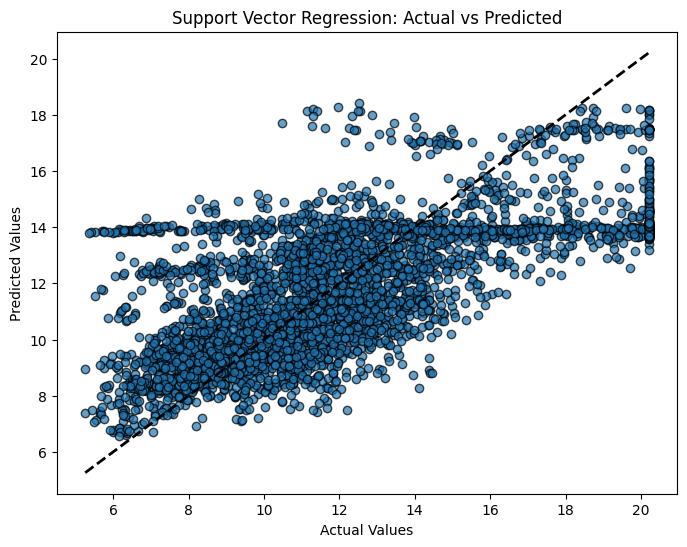

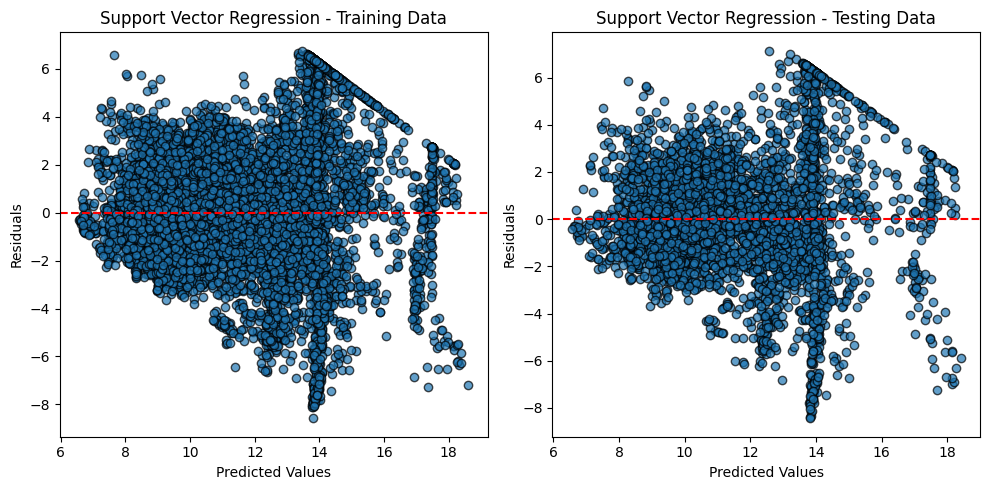

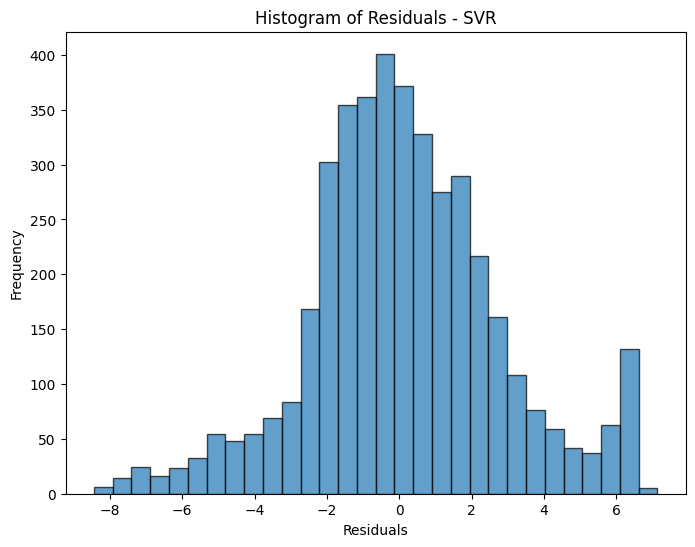

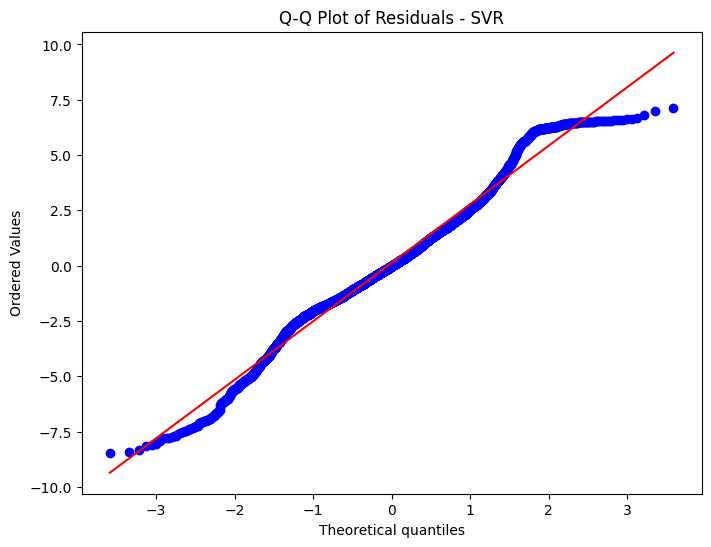

Training time: 2.8862 sec


In [68]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import timeit

svr_reg = SVR()
svr_reg.fit(X_train, y_train)

svr_train_pred = svr_reg.predict(X_train)
svr_test_pred = svr_reg.predict(X_test)

svr_train_r2 = r2_score(y_train, svr_train_pred)
svr_test_r2 = r2_score(y_test, svr_test_pred)
svr_train_mse = mean_squared_error(y_train, svr_train_pred)
svr_test_mse = mean_squared_error(y_test, svr_test_pred)

svr_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [svr_train_mse, svr_test_mse],
    'R²': [svr_train_r2, svr_test_r2]
}

svr_results_df = pd.DataFrame(svr_results_dict)

print("Support Vector Regression Results:")
print(svr_results_df.to_string(index=False))

variance = svr_train_r2 - svr_test_r2
print('Variance:', variance)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.show()

def plot_residuals(model, X_train, y_train, X_test, y_test, title):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_res = y_train - train_pred
    test_res = y_test - test_pred

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_pred, train_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(test_pred, test_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Testing Data')

    plt.tight_layout()
    plt.show()

plot_residuals(svr_reg, X_train, y_train, X_test, y_test, "Support Vector Regression")

residuals = y_test - svr_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - SVR')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals - SVR')
plt.show()

start = timeit.default_timer()
svr_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: {:.4f} sec'.format(stop - start))


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

svr_reg = SVR()

cv_scores = cross_val_score(svr_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.45313606 0.44542568 0.46169068 0.46477077 0.47107497]
Average Cross-Validation Score: 0.45921963250020925


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

svr_reg = SVR()

cv_scores = cross_val_score(svr_reg, X_train, y_train, cv=5, scoring='r2')

average_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.45313606 0.44542568 0.46169068 0.46477077 0.47107497]
Average Cross-Validation Score: 0.45921963250020925


### 7. Decision Tree Regressor

Decision Tree Regressor Results:
 Dataset          MSE       R²
Training 3.938315e-30 1.000000
 Testing 1.540897e+00 0.880817
Variance: 0.11918348940938794


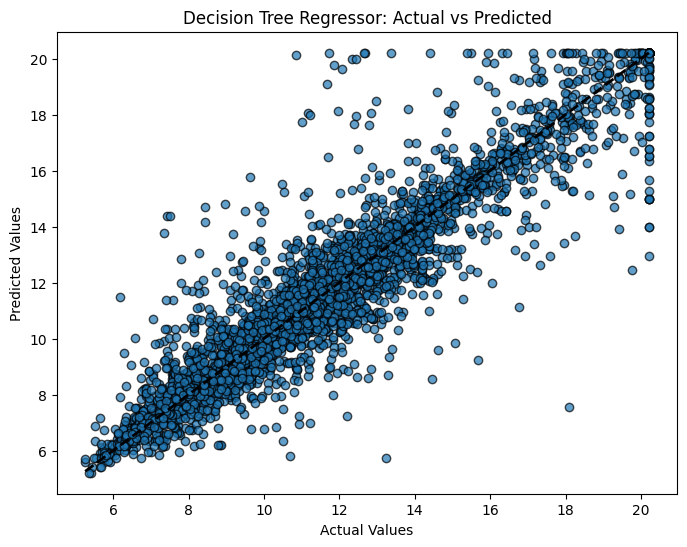

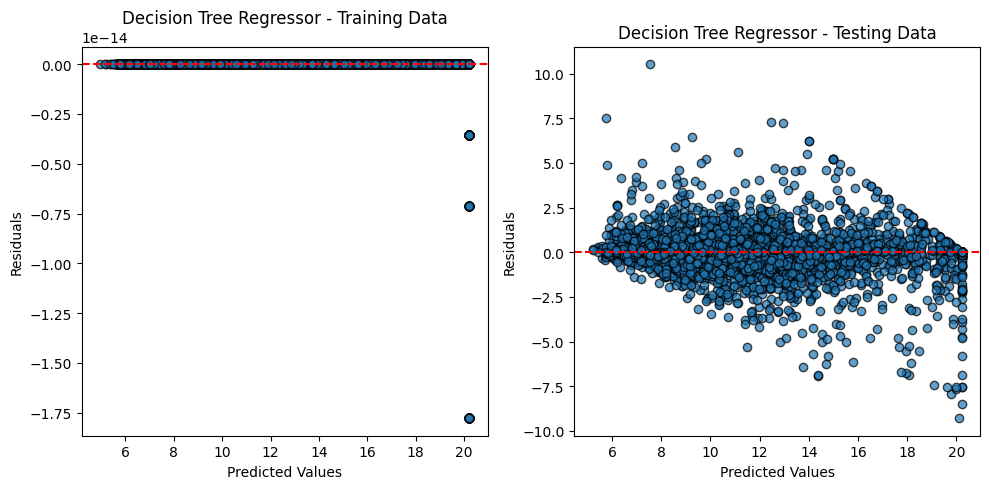

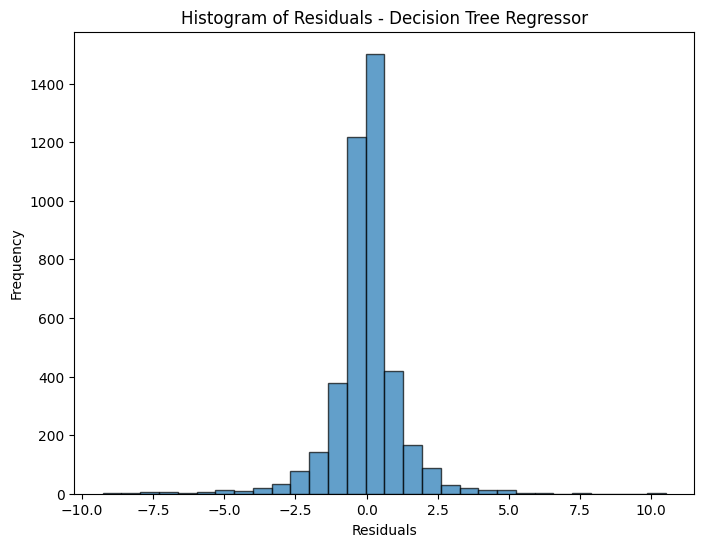

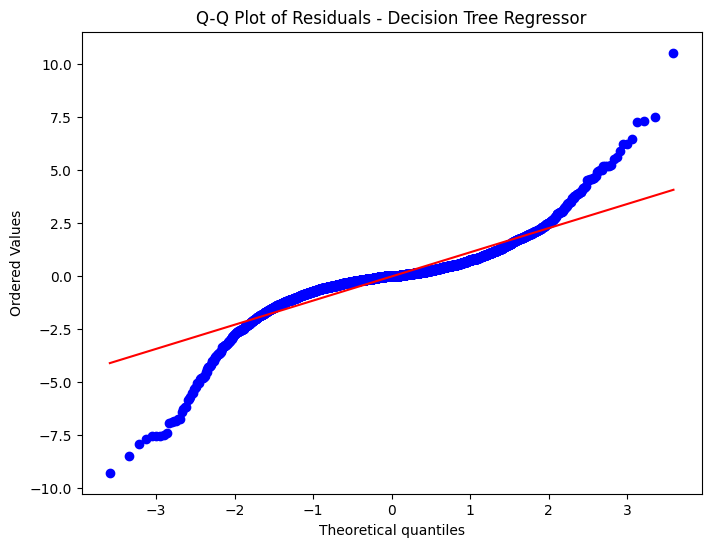

Training time: 0.1247 sec


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import timeit

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)


dt_train_pred = dt_reg.predict(X_train)
dt_test_pred = dt_reg.predict(X_test)

dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

decision_tree_results_dict = {
    'Dataset': ['Training', 'Testing'],
    'MSE': [dt_train_mse, dt_test_mse],
    'R²': [dt_train_r2, dt_test_r2]
}

decision_tree_results_df = pd.DataFrame(decision_tree_results_dict)


print("Decision Tree Regressor Results:")
print(decision_tree_results_df.to_string(index=False))


variance = dt_train_r2 - dt_test_r2
print('Variance:', variance)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.show()


def plot_residuals(model, X_train, y_train, X_test, y_test, title):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_res = y_train - train_pred
    test_res = y_test - test_pred

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_pred, train_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(test_pred, test_res, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Testing Data')

    plt.tight_layout()
    plt.show()


plot_residuals(dt_reg, X_train, y_train, X_test, y_test, "Decision Tree Regressor")


residuals = y_test - dt_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Decision Tree Regressor')
plt.show()


plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals - Decision Tree Regressor')
plt.show()


start = timeit.default_timer()
dt_reg.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: {:.4f} sec'.format(stop - start))


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


dt_reg = DecisionTreeRegressor(random_state=42)


cv_scores = cross_val_score(dt_reg, X_train, y_train, cv=5, scoring='r2')


average_cv_score = cv_scores.mean()


print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.87227988 0.88292073 0.85791354 0.87952341 0.8861246 ]
Average Cross-Validation Score: 0.875752430858134


## Conclusion



1. **Random Forest Regression**:
   - Shows very high performance on both training and testing datasets, with R² values close to 1 and low MSE. This suggests the model captures the complexity of the dataset well and generalizes effectively to new data.

2. **XGBoost Regressor**:
   - Also demonstrates high performance, though slightly lower than the Random Forest. The higher MSE on the test set compared to the training set may indicate a bit of overfitting but still maintains strong predictive power.

3. **Decision Tree Regressor**:
   - Exhibits almost perfect performance on the training data but a significant drop in the R² score and an increase in MSE on the testing data. This is a classic sign of overfitting—the model performs exceptionally well on the training data but less so on unseen data.

4. **Gradient Boosting**:
   - Has good performance metrics, though not as strong as Random Forest or XGBoost. The model shows signs of generalizing well with a reasonable gap between training and testing performance.

5. **Polynomial Regression**:
   - Shows moderate performance with over half of the variance in the testing data explained by the model. However, the MSE is relatively high, indicating that the model's predictions deviate from the actual values more than the ensemble models.

6. **Support Vector Regression (SVR)**:
   - Exhibits lower performance compared to ensemble methods, with less than half of the variance explained in both training and testing sets. The higher MSE suggests the predictions are less accurate.

7. **Linear Regression**
   -lowest performance of all. The low R² values suggest they are not capturing much of the variance in the data, and the high MSE values indicate poor predictive accuracy.

In summary, tree-based ensemble methods (Random Forest and XGBoost) outperform the other models, likely due to their ability to model complex, non-linear relationships and interactions between features. The Decision Tree model, while potentially too complex, and the ensemble methods seem to be the most suitable for this dataset. In contrast, simpler linear models (Linear Regression) and SVR do not perform as well, which may be due to their inability to capture the dataset's complexity. The Polynomial Regression model offers a balance between complexity and performance but still falls short of the ensemble methods' effectiveness.